## Load Libraries

In [1]:
suppressPackageStartupMessages({ 
    library(data.table) 
    library(dplyr) 
    library(ggplot2) 
    library(SingleCellExperiment)
    library(dplyr)
    library(celldex)
    library(SingleR)
    library(RColorBrewer)
    library(scater) 
    library(StabMap) 
    library(scran) 
    library(harmony) 
    library(patchwork)
    library(Seurat)
    library(plotly)
    library(pheatmap)
    library(batchelor)
    library(viridis)
    library(tradeSeq)
    library(reshape2)
    library(tidyr)
    #library(clusterExperiment)
    library(Cairo)
    library(ggridges)
    library(grid)
    library(png)
})

In [2]:
# Define the number of colors you want (e.g., 100)
n_colors <- 100
color <- plasma

# Get the Viridis color palette
palette <- color(n_colors)

# Invert the gradient by reversing the order of colors
inverted_palette <- rev(palette)

## List of Cell Types

In [3]:
#############################
######### MESODERM ##########
#############################

## list mesoderm posterior --> anterior along the primitive streak

Early_gastrula <- c("Epiblast",
                    "Caudal epiblast",
                    "Primitive Streak",
                    "Nascent mesoderm",
                    "PGC",
                    "Anterior primitive streak",
                    "Definitive endoderm")

yolksac_blood <- c("Haematoendothelial progenitors", 
                   "EMP", 
                   "MEP", 
                   "Megakaryocyte progenitors", 
                   "Blood progenitors", 
                   "Erythroid", 
                   "Chorioallantoic-derived erythroid progenitors")

endo <- c("YS endothelium",
          "Venous endothelium",
          "Embryo proper endothelium",
          "Allantois endothelium")
    
yolksac_other <- c("YS mesothelium-derived endothelial progenitors",
                   "YS mesothelium")

mesenchymal <- c("Embryo proper mesothelium",
                 "Mesenchyme")                   
                
allantois <- c("Allantois endothelium", 
               "Allantois")


In [4]:
#############################
######### MESODERM ##########
#############################

## list mesoderm posterior --> anterior along the primitive streak

Early_gastrula_2 <- c("Primitive Streak",
                    "Nascent mesoderm",
                    "PGC")

yolksac_blood <- c("Haematoendothelial progenitors", 
                   "EMP", 
                   "MEP", 
                   "Megakaryocyte progenitors", 
                   "Blood progenitors", 
                   "Erythroid", 
                   "Chorioallantoic-derived erythroid progenitors")

endo <- c("YS endothelium",
          "Venous endothelium",
          "Embryo proper endothelium",
          "Allantois endothelium")
    
yolksac_other <- c("YS mesothelium-derived endothelial progenitors",
                   "YS mesothelium")

yolksac_other_2 <- c("YS mesothelium-derived endothelial progenitors"
                   #"YS mesothelium"
                     )

mesenchymal <- c("Embryo proper mesothelium",
                 "Mesenchyme")                   
                
allantois <- c("Allantois" 
               #"Allantois endothelium"
              )

ExE_mesoderm <- c(yolksac_blood, endo, yolksac_other, mesenchymal, allantois) 

Cranial_mesoderm <- c("Cranial mesoderm")

Cardiac_mesoderm <- c("Pharyngeal mesoderm",
                  "Cardiopharyngeal progenitors",
                  "Cardiopharyngeal progenitors SHF",
                  "Anterior cardiopharyngeal progenitors",
                  "Cardiopharyngeal progenitors FHF",
                  "Cardiomyocytes FHF 1",
                  "Cardiomyocytes FHF 2",
                  "Cardiomyocytes SHF 1",
                  "Cardiomyocytes SHF 2",
                  "Epicardium",
                  "Endocardium")

Lateral_plate_mesoderm <- c("Lateral plate mesoderm",
                           "Limb mesoderm",
                           "Forelimb")

Intermediate_mesoderm <- c("Intermediate mesoderm", "Kidney primordium")

Paraxial_mesoderm <- c("Paraxial mesoderm", 
                  "Presomitic mesoderm", 
                  "Somitic mesoderm",
                  "Anterior somitic tissues",
                  "Posterior somitic tissues",
                  "Dermomyotome", 
                  "Endotome", 
                  "Sclerotome")

Axial_mesoderm <- c("Caudal mesoderm", 
                  "NMPs", 
                  "NMPs/Mesoderm-biased",
                  "Node",
                  "Notochord")
                       
Frontonasal_mesenchyme <- c("Frontonasal mesenchyme")

mesoderm_list <- c(Early_gastrula_2,
                   ExE_mesoderm, 
                   Cranial_mesoderm, 
                   Cardiac_mesoderm, 
                   Lateral_plate_mesoderm, 
                   Intermediate_mesoderm, 
                   Paraxial_mesoderm, 
                   Axial_mesoderm,
                   Frontonasal_mesenchyme)

non_ExE_mesoderm_list <- c(Early_gastrula_2,
                   Cranial_mesoderm, 
                   Cardiac_mesoderm, 
                   Lateral_plate_mesoderm, 
                   Intermediate_mesoderm, 
                   Paraxial_mesoderm, 
                   Axial_mesoderm,
                   Frontonasal_mesenchyme)

cardiac_somitic_mesoderm_list <- c(Cranial_mesoderm, 
                   Cardiac_mesoderm, 
                   Lateral_plate_mesoderm, 
                   Intermediate_mesoderm, 
                   Paraxial_mesoderm, 
                   Axial_mesoderm,
                   Frontonasal_mesenchyme)

hemato_endo <- c(yolksac_blood, 
                   endo, 
                   yolksac_other_2, 
                   allantois)

In [5]:
str(mesoderm_list)

 chr [1:50] "Primitive Streak" "Nascent mesoderm" "PGC" ...


In [6]:
#############################
######### ECTODERM ##########
#############################

Surface_ectoderm <- c("Amniotic ectoderm",
                  "Surface ectoderm",
                  "Epidermis",
                  "Placodal ectoderm",
                  "Otic placode",
                  "Otic neural progenitors",
                  "Limb ectoderm")

# list A --> P + D --> V
Neural_tube <- c("Neural tube",
                "Optic vesicle",
                "Early dorsal forebrain progenitors",
                "Late dorsal forebrain progenitors",
                "Ventral forebrain progenitors",
                "Midbrain progenitors",
                "Dorsal midbrain neurons",
                "Midbrain/Hindbrain boundary",
                "Dorsal hindbrain progenitors", 
                "Hindbrain floor plate",
                "Hindbrain neural progenitors",
                "Ventral hindbrain progenitors",
                "Dorsal spinal cord progenitors",
                "Spinal cord progenitors")

Neural_crest <- c("Migratory neural crest",
                "Branchial arch neural crest")

extra_ectoderm <- c("Ectoderm", "Non-neural ectoderm")

ectoderm_list <- c(Surface_ectoderm, Neural_tube, Neural_crest, extra_ectoderm, "Epiblast", "Caudal epiblast")



In [7]:
#############################
######### ENDODERM ##########
#############################
## list endoderm early --> late, anterior --> posterior 

Primitive_endoderm <- c("Parietal endoderm", 
                     "ExE endoderm",
                     "Visceral endoderm")

Definitive_endoderm <- c("Anterior Primitive Streak",
                 "Gut tube",
                 "Foregut",
                 "Midgut",
                 "Hindgut",
                 "Pharyngeal endoderm",
                 "Thyroid primordium")

endoderm_list <- c(Definitive_endoderm, Primitive_endoderm)

In [8]:
str(ectoderm_list)

 chr [1:27] "Amniotic ectoderm" "Surface ectoderm" "Epidermis" ...


In [9]:
all_germlayer_list <- c(ectoderm_list, mesoderm_list, endoderm_list)

str(all_germlayer_list)

 chr [1:87] "Amniotic ectoderm" "Surface ectoderm" "Epidermis" ...


In [10]:
all_cells <- c("Allantois", "Allantois endothelium", "Amniotic ectoderm", "Anterior cardiopharyngeal progenitors",
               "Anterior Primitive Streak", "Anterior somitic tissues", "Blood progenitors",
               "Branchial arch neural crest", "Cardiomyocytes FHF 1", "Cardiomyocytes FHF 2", "Cardiomyocytes SHF 1",
               "Cardiomyocytes SHF 2", "Cardiopharyngeal progenitors", "Cardiopharyngeal progenitors FHF",
               "Cardiopharyngeal progenitors SHF", "Caudal epiblast", "Caudal mesoderm",
               "Chorioallantoic-derived erythroid progenitors", "Cranial mesoderm", "Dermomyotome",
               "Dorsal hindbrain progenitors", "Dorsal midbrain neurons", "Dorsal spinal cord progenitors",
               "Early dorsal forebrain progenitors", "Ectoderm", "Embryo proper endothelium",
               "Embryo proper mesothelium", "EMP", "Endocardium", "Endotome", "Epiblast", "Epicardium", "Epidermis",
               "Erythroid", "ExE ectoderm", "ExE endoderm", "Foregut", "Forelimb", "Frontonasal mesenchyme",
               "Gut tube", "Haematoendothelial progenitors", "Hindbrain floor plate", "Hindbrain neural progenitors",
               "Hindgut", "Intermediate mesoderm", "Kidney primordium", "Late dorsal forebrain progenitors",
               "Lateral plate mesoderm", "Limb ectoderm", "Limb mesoderm", "Megakaryocyte progenitors", "MEP",
               "Mesenchyme", "Midbrain progenitors", "Midbrain/Hindbrain boundary", "Midgut", "Migratory neural crest",
               "Nascent mesoderm", "Neural tube", "NMPs", "NMPs/Mesoderm-biased", "Node", "Non-neural ectoderm",
               "Notochord", "Optic vesicle", "Otic neural progenitors", "Otic placode", "Paraxial mesoderm",
               "Parietal endoderm", "PGC", "Pharyngeal endoderm", "Pharyngeal mesoderm", "Placodal ectoderm",
               "Posterior somitic tissues", "Presomitic mesoderm", "Primitive Streak", "Sclerotome", "Somitic mesoderm",
               "Spinal cord progenitors", "Surface ectoderm", "Thyroid primordium", "Venous endothelium",
               "Ventral forebrain progenitors", "Ventral hindbrain progenitors", "Visceral endoderm",
               "YS endothelium", "YS mesothelium", "YS mesothelium-derived endothelial progenitors")

In [11]:
str(all_cells)

 chr [1:88] "Allantois" "Allantois endothelium" "Amniotic ectoderm" ...


In [12]:
# Split the character vector into four smaller vectors
split_size <- 22
char_vector_1 <- all_cells[1:split_size]
char_vector_2 <- all_cells[(split_size + 1):(2 * split_size)]
char_vector_3 <- all_cells[(2 * split_size + 1):(3 * split_size)]
char_vector_4 <- all_cells[(3 * split_size + 1):length(all_cells)]

# Print the smaller vectors
print(char_vector_1)
print(char_vector_2)
print(char_vector_3)
print(char_vector_4)

 [1] "Allantois"                                    
 [2] "Allantois endothelium"                        
 [3] "Amniotic ectoderm"                            
 [4] "Anterior cardiopharyngeal progenitors"        
 [5] "Anterior Primitive Streak"                    
 [6] "Anterior somitic tissues"                     
 [7] "Blood progenitors"                            
 [8] "Branchial arch neural crest"                  
 [9] "Cardiomyocytes FHF 1"                         
[10] "Cardiomyocytes FHF 2"                         
[11] "Cardiomyocytes SHF 1"                         
[12] "Cardiomyocytes SHF 2"                         
[13] "Cardiopharyngeal progenitors"                 
[14] "Cardiopharyngeal progenitors FHF"             
[15] "Cardiopharyngeal progenitors SHF"             
[16] "Caudal epiblast"                              
[17] "Caudal mesoderm"                              
[18] "Chorioallantoic-derived erythroid progenitors"
[19] "Cranial mesoderm"                       

In [13]:
not_in_both <- setdiff(unique(c(all_cells, all_germlayer_list)), intersect(all_cells, all_germlayer_list))

# Display the names that do not appear in both lists
print(not_in_both)

[1] "ExE ectoderm"


## Celltype Colours

In [14]:
refined_annotation_colors <- c(
"Epiblast" = "#635547",
"Primitive Streak" = "#DABE99", 
"Caudal epiblast" = "#9e6762",
"PGC" = "#FACB12",
"Anterior Primitive Streak" = "#c19f70",
"Node"="#153b3d",
"Notochord" = "#0F4A9C",
"Gut tube" = "#EF5A9D",
"Hindgut" = "#F397C0",
"Midgut" = "#ff00b2",
"Foregut" = "#ffb7ff",
"Pharyngeal endoderm"="#95e1ff",
"Thyroid primordium"="#97bad3",
"Nascent mesoderm" = "#C594BF",
"Intermediate mesoderm" = "#139992",
"Caudal mesoderm" = "#3F84AA",
#"Lateral plate mesoderm" = "#F9DFE6",
"Limb mesoderm" = "#e35f82",
#"Forelimb" = "#d02d75",
"Kidney primordium" = "#e85639",
"Presomitic mesoderm"="#5581ca",#"#0000ff",#blue
"Somitic mesoderm" = "#005579",
"Posterior somitic tissues" = "#5adbe4",#"#40e0d0",#turquoise
"Paraxial mesoderm" = "#8DB5CE",
"Cranial mesoderm" = "#456722",#"#006400",#darkgreen
"Anterior somitic tissues"= "#d5e839",
"Sclerotome" = "#e3cb3a",#"#ffff00",#yellow
"Dermomyotome" = "#00BFC4",#"#a52a2a",#brown
"Pharyngeal mesoderm" = "#C9EBFB",
#"Cardiopharyngeal progenitors" = "#556789",
"Anterior cardiopharyngeal progenitors"="#683ed8",
"Allantois" = "#532C8A",

"YS mesothelium" = "#ff7f9c",
"Epicardium"="#f79083",
"Embryo proper mesothelium" = "#ff487d",
"Cardiopharyngeal progenitors FHF"="#d780b0",
"Cardiomyocytes FHF 1"="#a64d7e",
"Cardiomyocytes FHF 2"="#B51D8D",

"Cardiomyocytes SHF 1"="#5d70dc",
"Cardiomyocytes SHF 2"="#332c6c",
"Haematoendothelial progenitors" = "#FBBE92",
"Blood progenitors" = "#6c4b4c",
"Erythroid" = "#C72228",
"Chorioallantoic-derived erythroid progenitors"="#E50000",
"Megakaryocyte progenitors"="#e3cb3a",
"MEP"="#EF4E22",

"YS endothelium"="#ff891c",
"YS mesothelium-derived endothelial progenitors"="#AE3F3F",
"Allantois endothelium"="#2f4a60",

  "Embryo proper endothelium #1" = "#69b8a5",  # Original color
  "Embryo proper endothelium #2" = "#b2dbce",  # Much lighter shade of the original color
  
  "Endocardium #1" = "#ff6666",  # Much lighter shade
  "Endocardium #2" = "#ffb3b3",  # Medium light shade
  "EMP" = "#5a0026",  # Darker than both Endocardium shades
    
"Venous endothelium"="#bd3400",

"NMPs/Mesoderm-biased" = "#89c1f5",
"NMPs" = "#8EC792",
"Ectoderm" = "#ff675c",
"Optic vesicle" = "#bd7300",
"Ventral forebrain progenitors"="#a0b689",
#"Early dorsal forebrain progenitors"="#0f8073",
#"Late dorsal forebrain progenitors"="#7a9941",
"Midbrain/Hindbrain boundary"="#8ab3b5",
"Midbrain progenitors"="#9bf981",
"Dorsal midbrain neurons"="#12ed4c",
"Ventral hindbrain progenitors"="#7e907a",
"Dorsal hindbrain progenitors"="#2c6521",
"Hindbrain floor plate"="#bf9da8",
"Hindbrain neural progenitors"="#59b545",
"Neural tube"="#233629",
"Migratory neural crest"="#4a6798",
"Branchial arch neural crest"="#bd84b0",
"Frontonasal mesenchyme"="#d3b1b1",
"Spinal cord progenitors"="#6b2035",
"Dorsal spinal cord progenitors"="#e273d6",
"Non-neural ectoderm" = "#f7f79e",
"Surface ectoderm" = "#fcff00",
"Epidermis" = "#fff335",
"Limb ectoderm" = "#ffd731",
"Amniotic ectoderm" = "#dbb400",
"Placodal ectoderm" = "#ff5c00",
"Otic placode"="#f1a262",
"Otic neural progenitors"="#00b000",
"Visceral endoderm" = "#F6BFCB",
"ExE endoderm" = "#7F6874",
#"ExE ectoderm" = "#989898",
"Parietal endoderm" = "#1A1A1A",
"Endotome" = "#808080",
    
#"failed_qc" = "#E0E0E0",

"Non-neural ectoderm, Surface ectoderm" = "#f7f79e",
"Dorsal spinal cord progenitors, Neural tube" = "#e273d6",

 "ExE ectoderm proximal" = "#696969",
  #"proximal ExE ectoderm #2" = "#696969",
  "ExE ectoderm distal" = "#A0A0A0",
  #"distal ExE ectoderm #2" = "#A0A0A0",

"Anterior LPM"="#F9DFE6",
    
"ExE mesoderm" = "#956D91",              # Purple
"ExE mesoderm and Anterior LPM" = "#D48A8D",    # Medium Purple
#"mesenchyme" = "#C17175",                # Existing color
"Mesenchyme" = "#cc7818",                # Existing color
"ExE mesoderm and Posterior LPM" = "#9B81CF" # Blue Violet
#"posterior somatic LP mesoderm #2" = "#9B81CF" # Medium Slate Blue
#"allantois" = "#532C8A",                 # Existing color
#"splanchnic LP mesoderm #1" = "#BA55D3", # Medium Orchid
#"splanchnic LP mesoderm #2" = "#9932CC"  # Dark Orchid
    )

In [15]:
seurat_colors <- c(
 "0" = "#FACB12",
  "1" = "#DABE99",
  "2" = "#9e6762",
  "3" = "#635547",
  "4" = "#c19f70",
  "5" = "#F397C0",
  "6" = "#ff00b2",
  "7" = "#ffb7ff",
  "8" = "#95e1ff",
  "9" = "#97bad3",
  "10" = "#C594BF",
  "11" = "#139992",
  "12" = "#3F84AA",
  "13" = "#F9DFE6",
  "14" = "#e35f82",
  "15" = "#d02d75",
  "16" = "#e85639",
  "17" = "#5581ca",
  "18" = "#005579",
  "19" = "#5adbe4",
  "20" = "#8DB5CE",
  "21" = "#456722",
  "22" = "#d5e839",
  "23" = "#e3cb3a",
  "24" = "#00BFC4",
  "25" = "#C9EBFB",
  "26" = "#556789",
  "27" = "#683ed8",
  "28" = "#532C8A",
  "29" = "#cc7818",
  "30" = "#ff7f9c",
  "31" = "#f79083",
  "32" = "#ff487d",
  "33" = "#d780b0",
  "34" = "#a64d7e",
  "35" = "#B51D8D",
  "36" = "#4b7193",
  "37" = "#5d70dc",
  "38" = "#332c6c",
  "39" = "#FBBE92",
  "40" = "#6c4b4c",
  "41" = "#4b7193",
  "42" = "#5d70dc",
  "43" = "#332c6c",
  "44" = "#FBBE92",
  "45" = "#6c4b4c",
  "46" = "#C72228",
  "47" = "#E50000",
  "48" = "#e3cb3a",
  "49" = "#EF4E22",
  "50" = "#7c2a47",
  "51" = "#ff891c",
  "52" = "#AE3F3F",
  "53" = "#2f4a60",
  "54" = "#90e3bf",
  "55" = "#bd3400",
  "56" = "#9d0049",
  "57" = "#89c1f5",
  "58" = "#8EC792",
  "59" = "#ff675c",
  "60" = "#bd7300",
  "61" = "#a0b689",
  "62" = "#0f8073",
  "63" = "#7a9941",
  "64" = "#8ab3b5",
  "65" = "#9bf981",
  "66" = "#12ed4c",
  "67" = "#7e907a",
  "68" = "#2c6521",
  "69" = "#bf9da8",
  "70" = "#59b545",
  "71" = "#233629",
  "72" = "#4a6798",
  "73" = "#bd84b0",
  "74" = "#d3b1b1",
  "75" = "#6b2035",
  "76" = "#e273d6",
  "77" = "#f7f79e",
  "78" = "#fcff00",
  "79" = "#fff335",
  "80" = "#ffd731",
  "81" = "#dbb400",
  "82" = "#ff5c00",
  "83" = "#f1a262",
  "84" = "#00b000",
  "85" = "#F6BFCB",
  "86" = "#7F6874",
  "87" = "#989898",
  "88" = "#1A1A1A"
)

In [16]:
stages_colors = c(
"E6.5" = "#F21A00",
"E6.75" = "#EC4B00",
"E7.0" = "#E67D00",
"E7.25" = "#E1AF00",
"E7.5" = "#E4B80E",
"E7.75"="#E7C21C",
"E8.0" = "#EBCC2A",
"E8.25" = "#C4C55D",
"E8.5" = "#9EBE91",
"E8.75" = "#78B7C5",
"E9.0" = "#3399FF",
"E9.25"="#297ACC",
"E9.5"="#2162A3",
"Mixed gastrulation" = "#BEBEBE")

In [17]:
embryo_colors = c(
"embryo1" = "#F21A00",
"embryo2" = "#E67D00",
"embryo3" = "#E4B80E",
"embryo4" = "#EBCC2A",
"embryo5" = "#9EBE91",
"embryo6" = "#3399FF",
"embryo7"="#2162A3")

In [18]:
anatomy_colors = c(
"EP" = "#000000",
"YS" = "#5E4FA2",
"Anterior section" = "#774611",
"Posterior section" = "#A2D630",
"Medial section" = "#D95F02",
"Posterior"="#E2C207",
"Anterior" = "#F71616",
"Pooled" = "#BEBEBE",
"NA" = "#BEBEBE")

In [19]:
original.colors = c(
  "Epiblast" = "#635547",
  "Primitive Streak" = "#DABE99",
  "Anterior Primitive Streak" = "#c19f70",
  "Caudal epiblast" = "#9e6762",
  "PGC" = "#FACB12",
  "Anterior Primitive_Streak" = "#c19f70",
  "Notochord" = "#0F4A9C",
  "Def. endoderm" = "#F397C0",
  "Gut" = "#EF5A9D",
  "Nascent mesoderm" = "#C594BF",
  "Mixed mesoderm" = "#DFCDE4",
  "Intermediate mesoderm" = "#139992",
  "Caudal Mesoderm" = "#3F84AA",
  "Paraxial mesoderm" = "#8DB5CE",
  "Somitic mesoderm" = "#005579",
  "Pharyngeal mesoderm" = "#C9EBFB",
  "Cardiomyocytes" = "#B51D8D",
  "Allantois" = "#532C8A",
  "ExE mesoderm" = "#8870ad",
  "Mesenchyme" = "#cc7818",
  "Haematoendothelial progenitors" = "#FBBE92",
  "Endothelium" = "#ff891c",
  "Blood progenitors" = "#c9a997",
  "Blood progenitors 1" = "#f9decf",
  "Blood progenitors 2" = "#c9a997",
  "Erythroid" = "#EF4E22",
  "Erythroid1" = "#C72228",
  "Erythroid2" = "#f79083",
  "Erythroid3" = "#EF4E22",
  "NMP" = "#8EC792",
  "Neurectoderm" = "#65A83E",
  "Rostral neurectoderm" = "#65A83E",
  "Caudal neurectoderm" = "#354E23",
  "Neural crest" = "#C3C388",
  "Forebrain Midbrain_Hindbrain" = "#647a4f",
  "Spinal cord" = "#CDE088",
  "Surface ectoderm" = "#f7f79e",
  "Visceral endoderm" = "#F6BFCB",
  "ExE endoderm" = "#7F6874",
  "ExE ectoderm" = "#989898",
  "Parietal endoderm" = "#1A1A1A"
)

In [20]:
extended.colors = c(
"Epiblast" = "#635547",
"Epiblast_0" = "#635547",
"Epiblast_1" = "#FACB12",
"Primitive Streak" = "#DABE99",
"Caudal epiblast" = "#9e6762",
"PGC" = "#FACB12",
"Anterior Primitive Streak" = "#c19f70",
"Node"="#153b3d",
"Notochord" = "#0F4A9C",
"Gut tube" = "#EF5A9D",
"Hindgut" = "#F397C0",
"Midgut" = "#ff00b2",
"Foregut" = "#ffb7ff",
"Pharyngeal endoderm"="#95e1ff",
"Thyroid primordium"="#97bad3",
"Nascent mesoderm" = "#C594BF",
"Intermediate mesoderm" = "#139992",
"Caudal mesoderm" = "#3F84AA",
"Lateral plate mesoderm" = "#F9DFE6",
"Limb mesoderm" = "#e35f82",
"Forelimb" = "#d02d75",
"Kidney primordium" = "#e85639",
"Presomitic mesoderm"="#5581ca",#"#0000ff",#blue
"Somitic mesoderm" = "#005579",
"Posterior somitic tissues" = "#5adbe4",#"#40e0d0",#turquoise
"Paraxial mesoderm" = "#8DB5CE",
"Cranial mesoderm" = "#456722",#"#006400",#darkgreen
"Anterior somitic tissues"= "#d5e839",
"Sclerotome" = "#e3cb3a",#"#ffff00",#yellow
"Dermomyotome" = "#00BFC4",#"#a52a2a",#brown
"Pharyngeal mesoderm" = "#C9EBFB",
"Cardiopharyngeal progenitors" = "#556789",
"Anterior cardiopharyngeal progenitors"="#683ed8",
"Allantois" = "#532C8A",
"Mesenchyme" = "#cc7818",
"YS mesothelium" = "#ff7f9c",
"Epicardium"="#f79083",
"Embryo proper mesothelium" = "#ff487d",
"Cardiopharyngeal progenitors FHF"="#d780b0",
"Cardiomyocytes FHF 1"="#a64d7e",
"Cardiomyocytes FHF 2"="#B51D8D",
"Cardiopharyngeal progenitors SHF"="#4b7193",
"Cardiomyocytes SHF 1"="#5d70dc",
"Cardiomyocytes SHF 2"="#332c6c",
"Haematoendothelial progenitors" = "#FBBE92",
"Blood progenitors" = "#6c4b4c",
"Erythroid" = "#C72228",
"Chorioallantoic-derived erythroid progenitors"="#E50000",
"Megakaryocyte progenitors"="#e3cb3a",
"MEP"="#EF4E22",
"EMP"="#7c2a47",
"YS endothelium"="#ff891c",
"YS mesothelium-derived endothelial progenitors"="#AE3F3F",
"Allantois endothelium"="#2f4a60",
"Embryo proper endothelium"="#90e3bf",
"Venous endothelium"="#bd3400",
"Endocardium"="#9d0049",
"NMPs/Mesoderm-biased" = "#89c1f5",
"NMPs" = "#8EC792",
"Ectoderm" = "#ff675c",
"Optic vesicle" = "#bd7300",
"Ventral forebrain progenitors"="#a0b689",
"Early dorsal forebrain progenitors"="#0f8073",
"Late dorsal forebrain progenitors"="#7a9941",
"Midbrain/Hindbrain boundary"="#8ab3b5",
"Midbrain progenitors"="#9bf981",
"Dorsal midbrain neurons"="#12ed4c",
"Ventral hindbrain progenitors"="#7e907a",
"Dorsal hindbrain progenitors"="#2c6521",
"Hindbrain floor plate"="#bf9da8",
"Hindbrain neural progenitors"="#59b545",
"Neural tube"="#233629",
"Migratory neural crest"="#4a6798",
"Branchial arch neural crest"="#bd84b0",
"Frontonasal mesenchyme"="#d3b1b1",
"Spinal cord progenitors"="#6b2035",
"Dorsal spinal cord progenitors"="#e273d6",
"Non-neural ectoderm" = "#f7f79e",
"Surface ectoderm" = "#fcff00",
"Epidermis" = "#fff335",
"Limb ectoderm" = "#ffd731",
"Amniotic ectoderm" = "#dbb400",
"Placodal ectoderm" = "#ff5c00",
"Otic placode"="#f1a262",
"Otic neural progenitors"="#00b000",
"Visceral endoderm" = "#F6BFCB",
"ExE endoderm" = "#7F6874",
"ExE ectoderm" = "#989898",
"Parietal endoderm" = "#1A1A1A",
"Endotome" = "#1A1A1A"
)

## Data Locations

In [21]:
##### Load in Seurat Objects for post QC analyses #####

io = list()
io$main = "/rds/project/rds-SDzz0CATGms/users/ltgh2" # this is the main directory

# Set the working directory
setwd(io$main)

io$seqFISH_preQC = file.path(io$main, "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds") 

##### Load in StabMAP_Outputs #####
io$StabMAP_reweighted_MNNcorrected_original_counts_without_neigh_preQC = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_original_counts_without_neigh.Rds")
io$StabMAP_reweighted_MNNcorrected_integrated_counts_without_neigh_preQC = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_integrated_counts_without_neigh.Rds")

## Load in the seqFISH CellType Labels
io$seqFISH_labels_preQC = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_label_transfer/output/StabMAP_all_stages_reweighted_MNNcorrected_original_counts_without_neigh_LABELS.Rds")

## Load in the seqFISH UMAP coordinates
io$seqFISH_UMAP_preQC = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/stab_map_umap_generation/processed/StabMAP_allstage_MNNoriginal_UMAP.rds")

In [22]:
##### Load in Seurat Objects for post QC analyses #####

# Set the working directory
setwd(io$main)

io$atlas = file.path(io$main, "projects/03_seqFISH_FINAL/code/extended_atlas_integration/processed_downsampled/downsample_10K_within_timpoint_all_stages.Rds")
io$seqFISH = file.path(io$main, "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_after_QC_filtering_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds") 

##### Load in StabMAP_Outputs #####
io$StabMAP_reweighted_MNNcorrected_original_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_original_counts_without_neigh.Rds")
io$StabMAP_reweighted_MNNcorrected_integrated_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_integrated_counts_without_neigh.Rds")

## Load in the seqFISH CellType Labels
io$seqFISH_labels = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_label_transfer/output/StabMAP_all_stages_post_QC_reweighted_MNNcorrected_original_counts_without_neigh_LABELS.Rds")

## Load in the seqFISH Imputed Gene Expression
io$seqFISH_imputed_logcounts_e6 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e6_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e7 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e7_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_1 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo1_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_2 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo2_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_3 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo3_postQC_imputed_RNA.Rds")

## Load in the seqFISH Imputed RAW COUNTS Gene Expression
io$seqFISH_imputed_counts_e6 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e6_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e7 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e7_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e8_1 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_embryo_1_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e8_2 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_embryo_2_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e8_3 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_embryo_3_postQC_imputed_raw_RNA_counts.Rds")


## Load in the seqFISH UMAP coordinates
io$seqFISH_UMAP = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/stab_map_umap_generation/processed/StabMAP_allstage_postQC_MNNoriginal_UMAP_seqFISH.rds")

In [23]:
## Load in the AP and DV Axes for the Early Embryos

io$seqFISH_scaled_APDV = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/generating_AP_DV_values/processed/APDV_raw_values_scaled_100_rank_normalized.Rds")

In [24]:
##### Load in the refined annotations and final metadata #####
io$FINAL_REFINED_ANNOTATIONS = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/FINAL_REFINED_ANNOTATIONS.Rds")

## Load in Seurat Objects and to the Seurat Object add the StabMAP UMAP, Transferred Cell Type Labels and Imputed Gene Expression Matrix

In [25]:
# Load in the seqFISH object_postQC
seqFISH = readRDS(io$seqFISH)

# Load in celltype, stage and anatomy labels
seqFISH_labels = readRDS(io$seqFISH_labels)
seqFISH <- AddMetaData(seqFISH, metadata = seqFISH_labels)

# Load in the StabMAP UMAP coordinates
seqFISH_UMAP = readRDS(io$seqFISH_UMAP)
seqFISH[["StabMAP_UMAP"]] <- seqFISH_UMAP

### this is the log normalized imputed gene expression from the 5 nearest neightbours using impute Embedding, fun = mean ####
# Load in the imputed gene expression 
seqFISH_imputed_logcounts_e6 = readRDS(io$seqFISH_imputed_logcounts_e6)
seqFISH_imputed_logcounts_e7 = readRDS(io$seqFISH_imputed_logcounts_e7)
seqFISH_imputed_logcounts_e8_1 = readRDS(io$seqFISH_imputed_logcounts_e8_1)
seqFISH_imputed_logcounts_e8_2 = readRDS(io$seqFISH_imputed_logcounts_e8_2)
seqFISH_imputed_logcounts_e8_3 = readRDS(io$seqFISH_imputed_logcounts_e8_3)

# Create a combined matrix of gene expression across all time points
imputed_expression <- cbind(seqFISH_imputed_logcounts_e6$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e7$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_1$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_2$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_3$scRNA.RNA)

# Creat a new assay object to store imputed data
imp <- CreateAssayObject(data = imputed_expression)

# add this assay to the previously created Seurat object
seqFISH[["imputed"]] <- imp

### this is the log normalized imputed gene expression from the 5 nearest neightbours using impute Embedding, fun = mean ####
# Load in the imputed gene expression 
seqFISH_imputed_counts_e6 = readRDS(io$seqFISH_imputed_counts_e6)
seqFISH_imputed_counts_e7 = readRDS(io$seqFISH_imputed_counts_e7)
seqFISH_imputed_counts_e8_1 = readRDS(io$seqFISH_imputed_counts_e8_1)
seqFISH_imputed_counts_e8_2 = readRDS(io$seqFISH_imputed_counts_e8_2)
seqFISH_imputed_counts_e8_3 = readRDS(io$seqFISH_imputed_counts_e8_3)

# Create a combined matrix of gene expression across all time points
imputed_counts_expression <- cbind(seqFISH_imputed_counts_e6$scRNA.RNA, 
                            seqFISH_imputed_counts_e7$scRNA.RNA, 
                            seqFISH_imputed_counts_e8_1$scRNA.RNA, 
                            seqFISH_imputed_counts_e8_2$scRNA.RNA, 
                            seqFISH_imputed_counts_e8_3$scRNA.RNA)

# Creat a new assay object to store imputed data
impcounts <- CreateAssayObject(counts = imputed_counts_expression)

# add this assay to the previously created Seurat object
seqFISH[["imputedcounts"]] <- impcounts

seqFISH_postQC <- seqFISH

seqFISH_postQC

# Load in celltype, stage and anatomy labels
FINAL_REFINED_ANNOTATIONS_UPDATED = readRDS(io$FINAL_REFINED_ANNOTATIONS)

FINAL_REFINED_ANNOTATIONS <- FINAL_REFINED_ANNOTATIONS_UPDATED %>% 
  select(-embryo)

seqFISH_postQC <- AddMetaData(seqFISH_postQC, metadata = FINAL_REFINED_ANNOTATIONS)

Warning message:
“Cannot add objects with duplicate keys (offending key: UMAP_), setting key to 'stabmap_umap_'”


An object of class Seurat 
56393 features across 63188 samples within 5 assays 
Active assay: across_timepoint_integration (351 features, 351 variable features)
 4 other assays present: originalexp, within_timepoint_integration, imputed, imputedcounts
 6 dimensional reductions calculated: pca, umap, spatial, Shila_PCA, Shila_UMAP, StabMAP_UMAP

## Generate AP and DV Hex Colours for Each Cell

In [26]:
# Function to convert AP values to hex color with specified limits
AP_to_hex <- function(AP) {
  scales::col_numeric(
    palette = c("blue", "red"),
    domain = c(0, 100), # Setting the limits from 0 to 200
    na.color = NA
  )(AP)
}

# Add a new column with hex colors
seqFISH_postQC@meta.data$AP_hex <- AP_to_hex(seqFISH_postQC@meta.data$AP)

# Function to convert DV values to hex color with specified limits
DV_to_hex <- function(DV) {
  scales::col_numeric(
    palette = c("purple", "orange"),
    domain = c(0, 100), # Setting the limits from 0 to 200
    na.color = NA
  )(DV)
}

# Add a new column with hex colors
seqFISH_postQC@meta.data$DV_hex <- DV_to_hex(seqFISH_postQC@meta.data$DV)

In [27]:
##add a cell_ID column
seqFISH_postQC@meta.data$cell_ID <- row.names(seqFISH_postQC@meta.data)

In [28]:
# Load in the seqFISH object_preQC
seqFISH_preQC = readRDS(io$seqFISH_preQC)

In [29]:
# extract the metadata from the seqFISH_postQC
seqFISH_postQC_meta <- seqFISH_postQC@meta.data

## Scale the Imputed Raw and Imputed Nortmalized Counts Data from 5 Nearest Neighbours

In [30]:
assay <- "imputedcounts"
seqFISH_postQC <- NormalizeData(seqFISH_postQC, assay = assay)
seqFISH_postQC <- ScaleData(seqFISH_postQC, assay = assay)

Centering and scaling data matrix



In [32]:
#assay <- "imputed"
##seqFISH_postQC <- NormalizeData(seqFISH_postQC, assay = assay)
#seqFISH_postQC <- ScaleData(seqFISH_postQC, assay = assay)

In [33]:
#assay <- "originalexp"
#seqFISH_postQC <- NormalizeData(seqFISH_postQC, assay = assay)
#seqFISH_postQC <- ScaleData(seqFISH_postQC, assay = assay)

## Plot AP Values in Space for Multiple Embryos

Warning message:
“Removed 1096 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1417 rows containing missing values (`geom_point()`).”


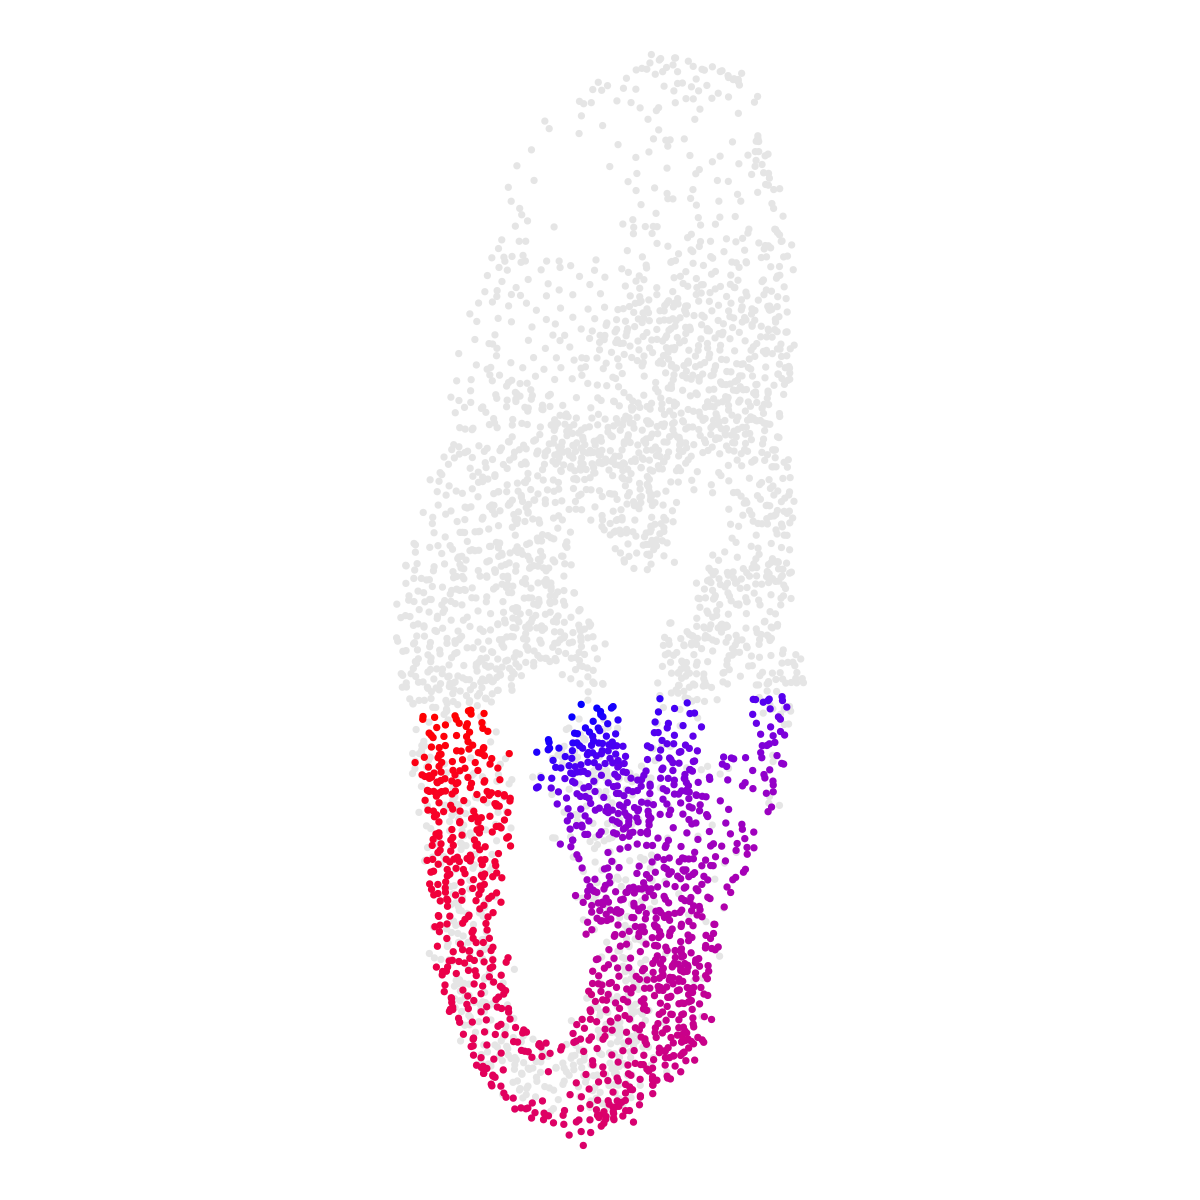

Warning message:
“Removed 1173 rows containing missing values (`geom_point()`).”


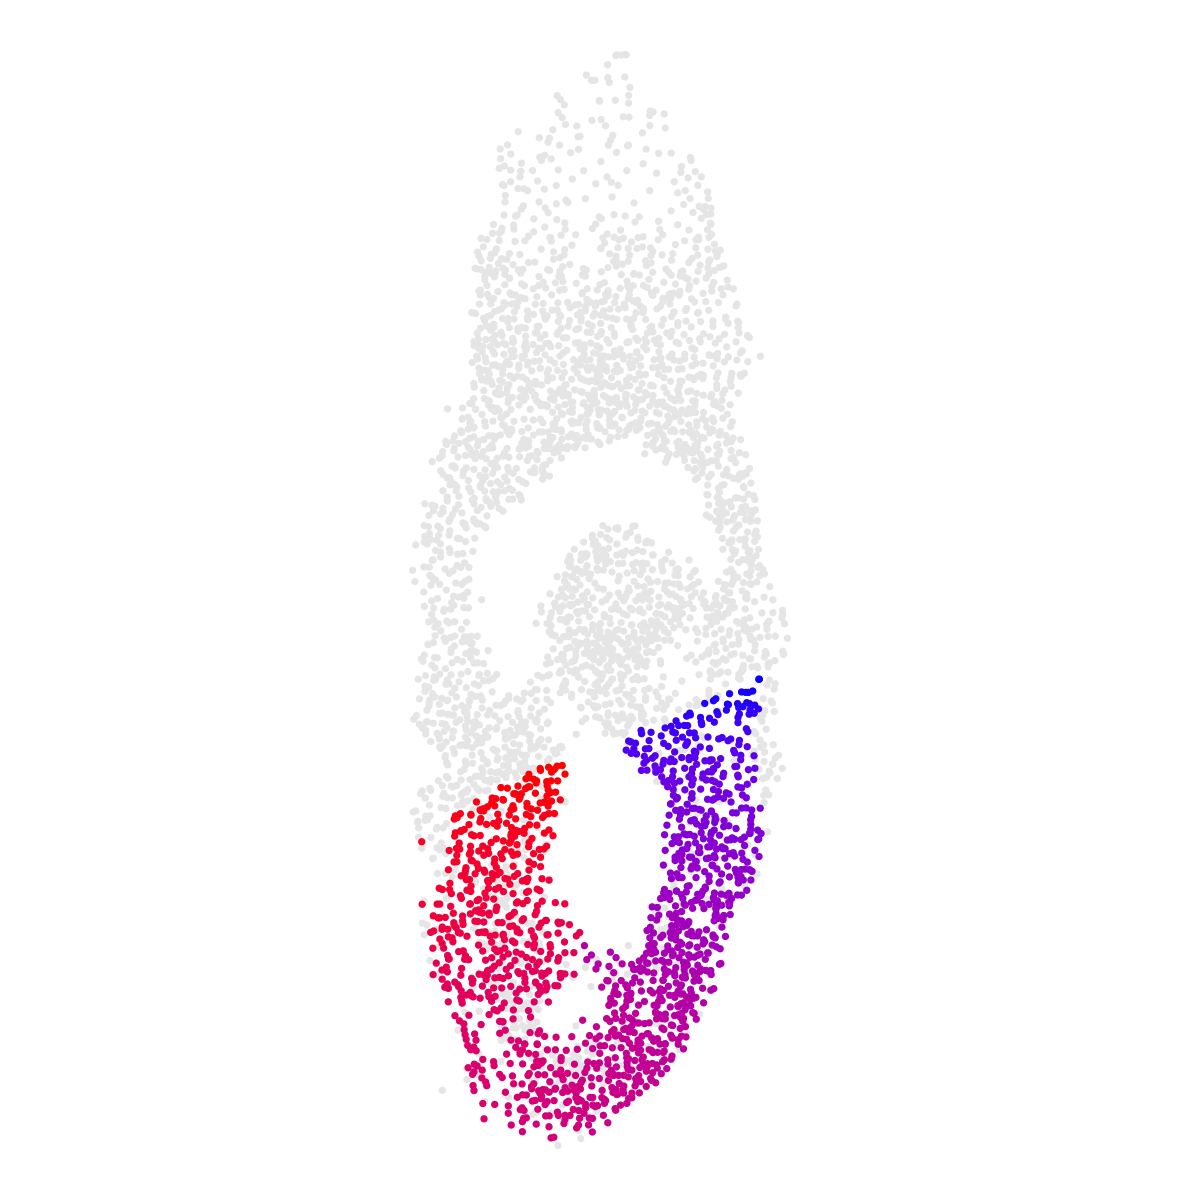

Warning message:
“Removed 38 rows containing missing values (`geom_point()`).”


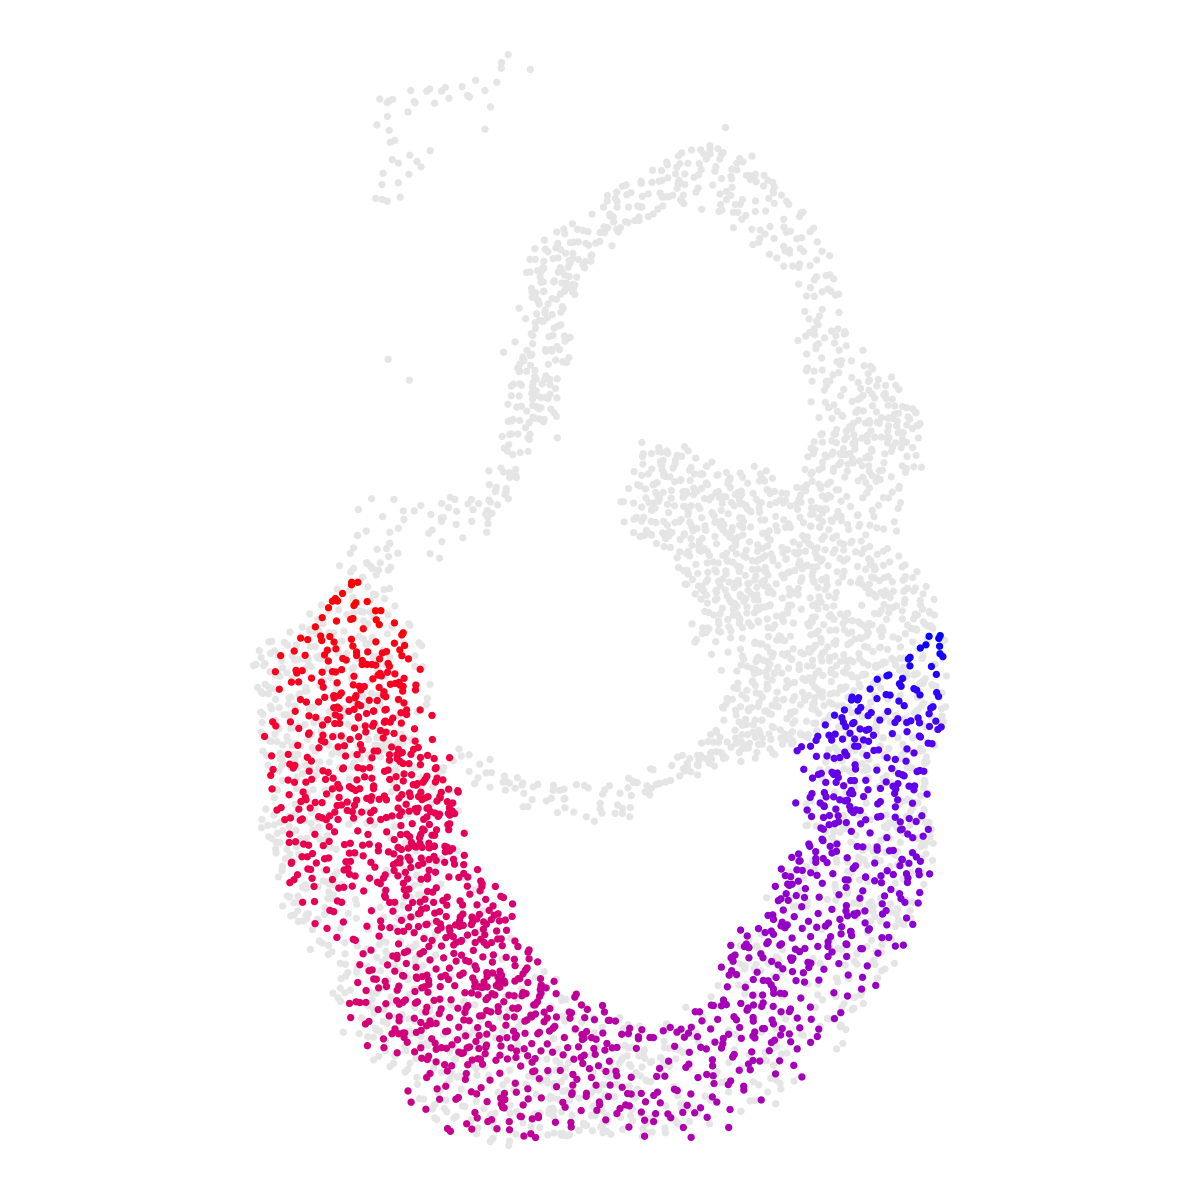

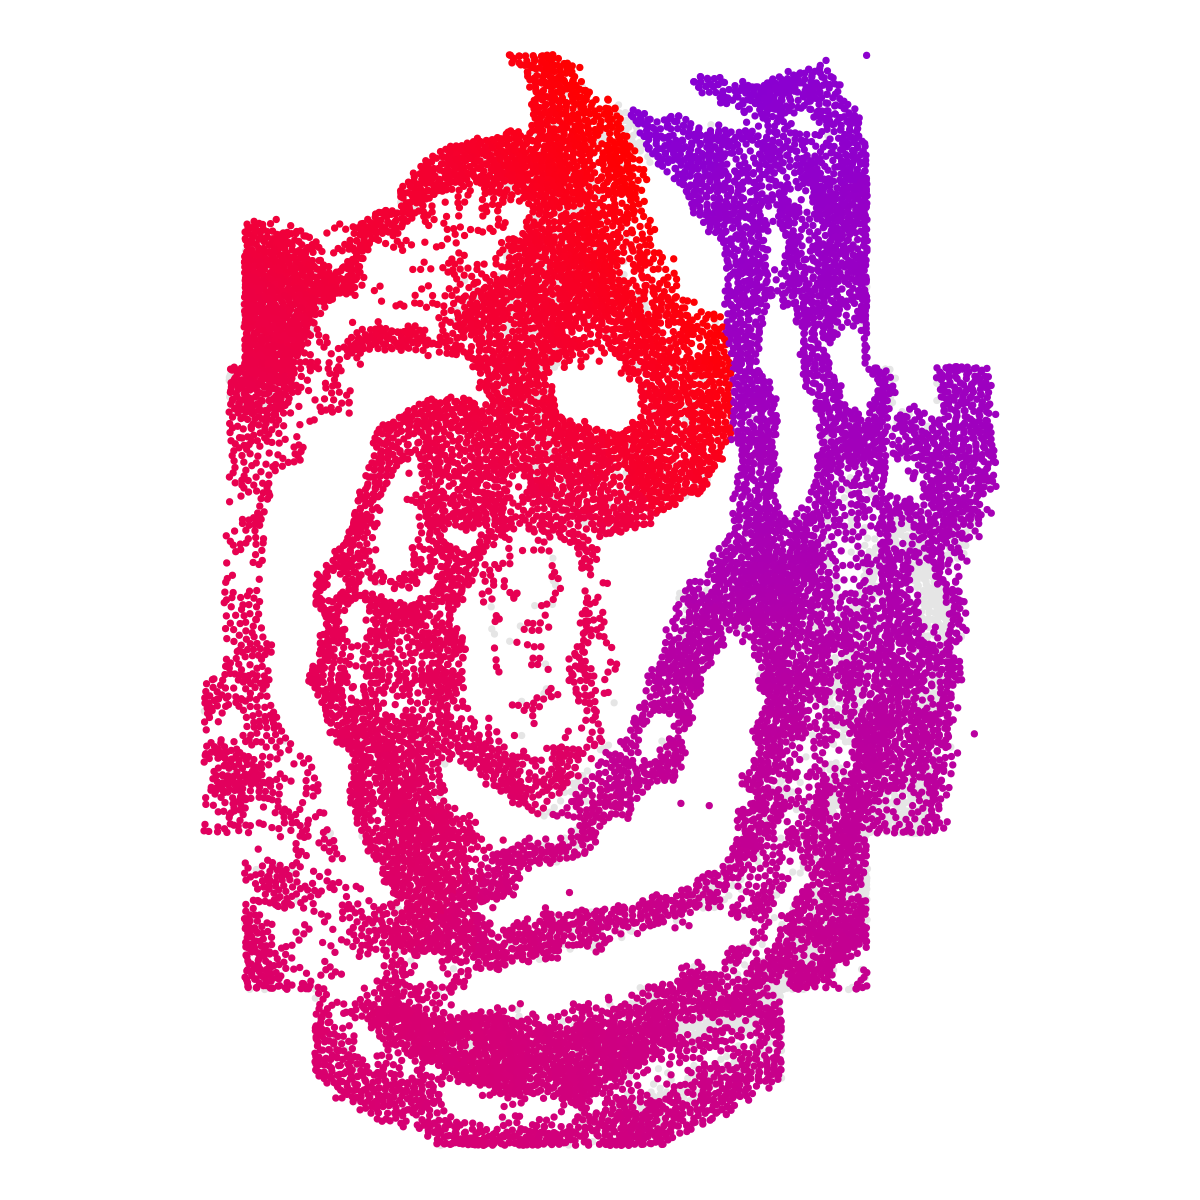

In [34]:
plot_AP_values <- function(seqFISH_postQC, seqFISH_preQC, 
                           cell_type_to_plot = "Epiblast", 
                           min_AP = 50, max_AP = 100, 
                           pt_size = 1, 
                           min_DV = 30, max_DV = 100, 
                           embryo_to_plot = "embryo_7",
                           output_dir = NULL,   # Add default value
                           file_name = "plot.pdf") {  # Add default value{
  
  # Extract meta.data
  seqFISH_postQC_meta <- seqFISH_postQC@meta.data
  seqFISH_preQC_meta <- seqFISH_preQC@meta.data
  
  options(repr.plot.width=10, repr.plot.height=10)
  
  # Calculate ranges
  AP_pos_max <- max(seqFISH_postQC_meta$AP, na.rm = TRUE)
  AP_pos_min <- min(seqFISH_postQC_meta$AP, na.rm = TRUE)
  
  DV_pos_max <- max(seqFISH_postQC_meta$DV, na.rm = TRUE)
  DV_pos_min <- min(seqFISH_postQC_meta$DV, na.rm = TRUE)
  
  dim2_max <- max(seqFISH_postQC_meta$dim2, na.rm = TRUE)
  dim2_min <- min(seqFISH_postQC_meta$dim2, na.rm = TRUE)
  
  ## Plot AP Values
  upper_bound <- AP_pos_max
  lower_bound <- AP_pos_min
  
  p1 <- ggplot(seqFISH_postQC_meta[seqFISH_postQC_meta$embryo == embryo_to_plot & 
                                    seqFISH_postQC_meta$joint_clusters_pass_QC == TRUE &
                                    seqFISH_postQC_meta$AP >= min_AP & 
                                    seqFISH_postQC_meta$AP <= max_AP & 
                                    seqFISH_postQC_meta$DV >= min_DV & 
                                    seqFISH_postQC_meta$DV <= max_DV , ], aes(dim1, dim2, col=AP)) + 
    geom_point(data=seqFISH_preQC_meta[seqFISH_preQC_meta$embryo == embryo_to_plot, ], col='grey90', size = 1) + 
    geom_point(size = pt_size) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound)) + 
    theme_void() + 
    theme(legend.position='none') + 
    coord_fixed()
  
  print(p1)
}


# Example usage:
p1 <- plot_AP_values(seqFISH_postQC, seqFISH_preQC,
               min_AP = 0, max_AP = 100,
               pt_size = 1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo6")

p2 <- plot_AP_values(seqFISH_postQC, seqFISH_preQC,
               min_AP = 0, max_AP = 100,
               pt_size = 1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo7")


p3 <- plot_AP_values(seqFISH_postQC, seqFISH_preQC,
               min_AP = 0, max_AP = 100,
               pt_size = 1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo4")

p4 <- plot_AP_values(seqFISH_postQC, seqFISH_preQC,
               min_AP = 0, max_AP = 100,
               pt_size = 1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo1")

In [35]:
colnames(FINAL_REFINED_ANNOTATIONS_UPDATED)

[1] "cell_ID"                                             
 [2] "orig.ident"                                          
 [3] "nCount_RNA"                                          
 [4] "nFeature_RNA"                                        
 [5] "seqFISH_celltype"                                    
 [6] "extended_atlas_celltype"                             
 [7] "AP"                                                  
 [8] "DV"                                                  
 [9] "dataset"                                             
[10] "cluster"                                             
[11] "subcluster"                                          
[12] "cluster_subcluster"                                  
[13] "stage"                                               
[14] "anatomy"                                             
[15] "UMAP_1"                                              
[16] "UMAP_2"                                              
[17] "celltype_PijuanSala2019"                             
[18] "majority_seqFISH_celltype"                           
[19] "majority_seqFISH_celltype_proportion"                
[20] "majority_extended_atlas_celltype"                    
[21] "majority_extended_atlas_celltype_proportion"         
[22] "majority_celltype_PijuanSala2019_celltype"           
[23] "majority_celltype_PijuanSala2019_celltype_proportion"
[24] "stage_transfer"                                      
[25] "poor_stage_alignment"                                
[26] "proportion_seqFISH_cells_per_subcluster"             
[27] "joint_clusters_pass_QC"                              
[28] "stage_alignment_pass_QC"                             
[29] "passed_QC"                                           
[30] "refined_annotation"                                  
[31] "embryo"

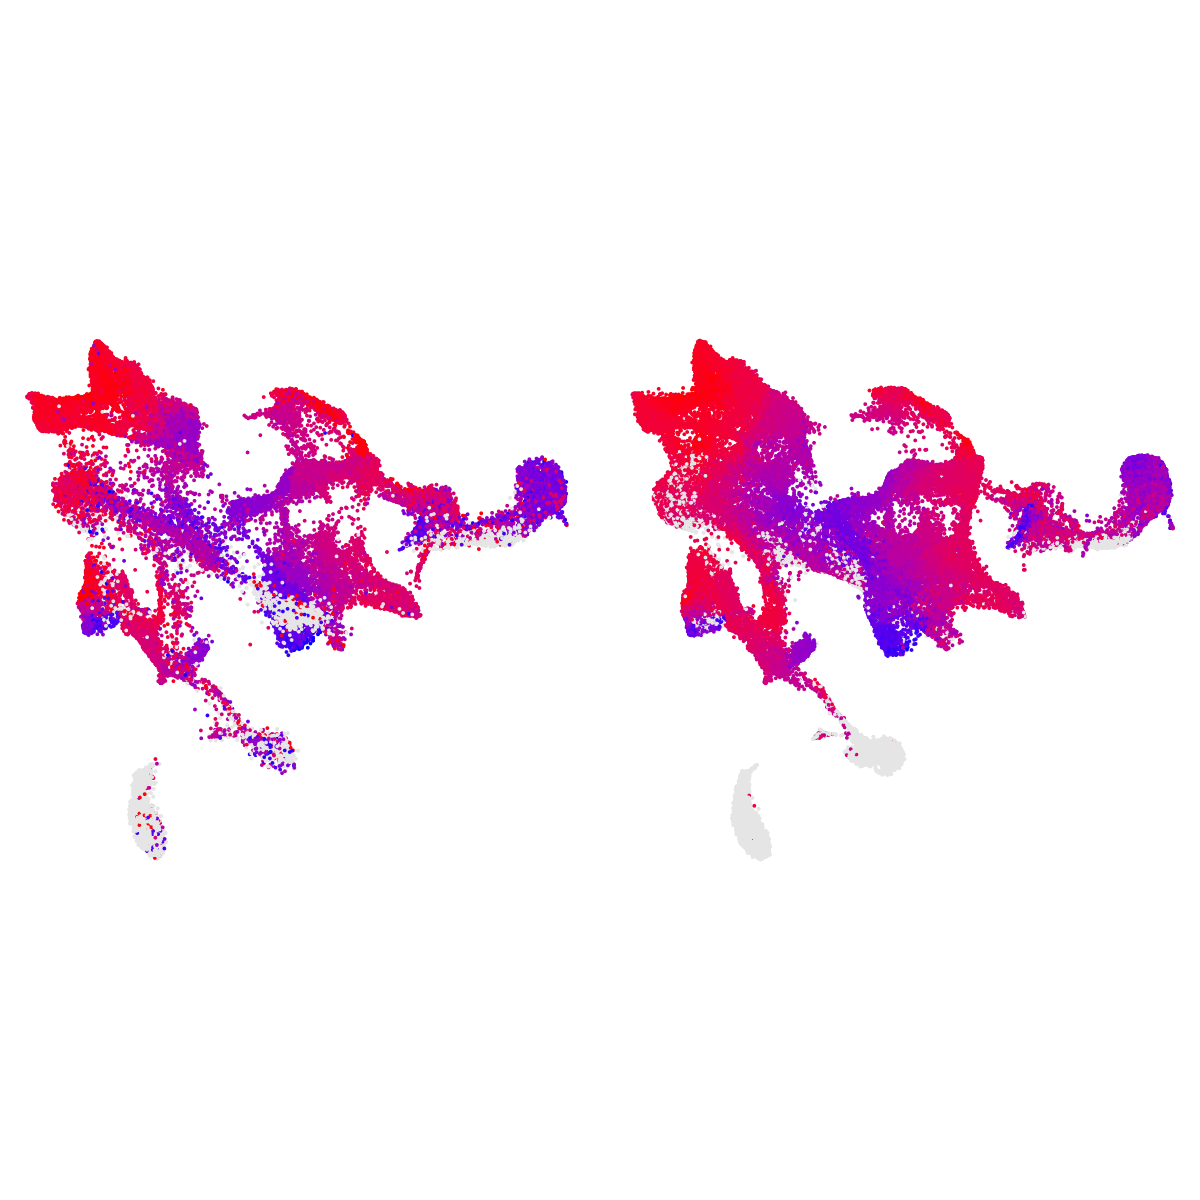

In [36]:
pt_size = 0.01
  upper_bound <- 100
  lower_bound <- 0
  
FINAL_REFINED_ANNOTATIONS_UPDATED$dataset <- factor(
  FINAL_REFINED_ANNOTATIONS_UPDATED$dataset,
  levels = c("seqFISH", "scRNA")  # Replace with your desired levels
)

p4 <- ggplot(FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE, ], aes(UMAP_1, UMAP_2, col=AP)) + 
    geom_point(data=FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE, ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    ggtitle(NULL) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound), na.value = "grey90") + 
    theme_void() + 
    theme(legend.position='none',
    strip.text = element_blank()) + 
    coord_fixed() + 
    facet_wrap(~dataset)
p4

In [37]:
pt_size = 0.01
  upper_bound <- 100
  lower_bound <- 0
  
FINAL_REFINED_ANNOTATIONS_UPDATED$dataset <- factor(
  FINAL_REFINED_ANNOTATIONS_UPDATED$dataset,
  levels = c("seqFISH", "scRNA")  # Replace with your desired levels
)

p5 <- ggplot(FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA" & 
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$anatomy == "Anterior section", ], aes(UMAP_1, UMAP_2, col=AP)) + 
    geom_point(data=FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                                      FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA", ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    ggtitle(NULL) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound), na.value = "grey90") + 
    theme_void() + 
    theme(legend.position='none',
    strip.text = element_blank()) + 
    coord_fixed()

p6 <- ggplot(FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA" & 
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$anatomy == "Medial section", ], aes(UMAP_1, UMAP_2, col=AP)) + 
    geom_point(data=FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                                      FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA", ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    ggtitle(NULL) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound), na.value = "grey90") + 
    theme_void() + 
    theme(legend.position='none',
    strip.text = element_blank()) + 
    coord_fixed()

p7 <- ggplot(FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA" & 
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$anatomy == "Posterior section", ], aes(UMAP_1, UMAP_2, col=AP)) + 
    geom_point(data=FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                                      FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA", ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    ggtitle(NULL) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound), na.value = "grey90") + 
    theme_void() + 
    theme(legend.position='none',
    strip.text = element_blank()) + 
    coord_fixed()

p8 <- ggplot(FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA" & 
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$anatomy == "Pooled", ], aes(UMAP_1, UMAP_2, col=AP)) + 
    geom_point(data=FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                                      FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA", ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    ggtitle(NULL) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound), na.value = "grey90") + 
    theme_void() + 
    theme(legend.position='none',
    strip.text = element_blank()) + 
    coord_fixed()

In [38]:
table(FINAL_REFINED_ANNOTATIONS_UPDATED$anatomy)


         Anterior  Anterior section                EP    Medial section 
             1809             10417             38232             11313 
           Pooled         Posterior Posterior section                YS 
           111278              1472              4490              9736 

#### Generating Combined Panels

Warning message:
“Removed 1096 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1417 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1173 rows containing missing values (`geom_point()`).”


png 
  2

Plot saved to projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/AP_values_SPATIAL.pdf

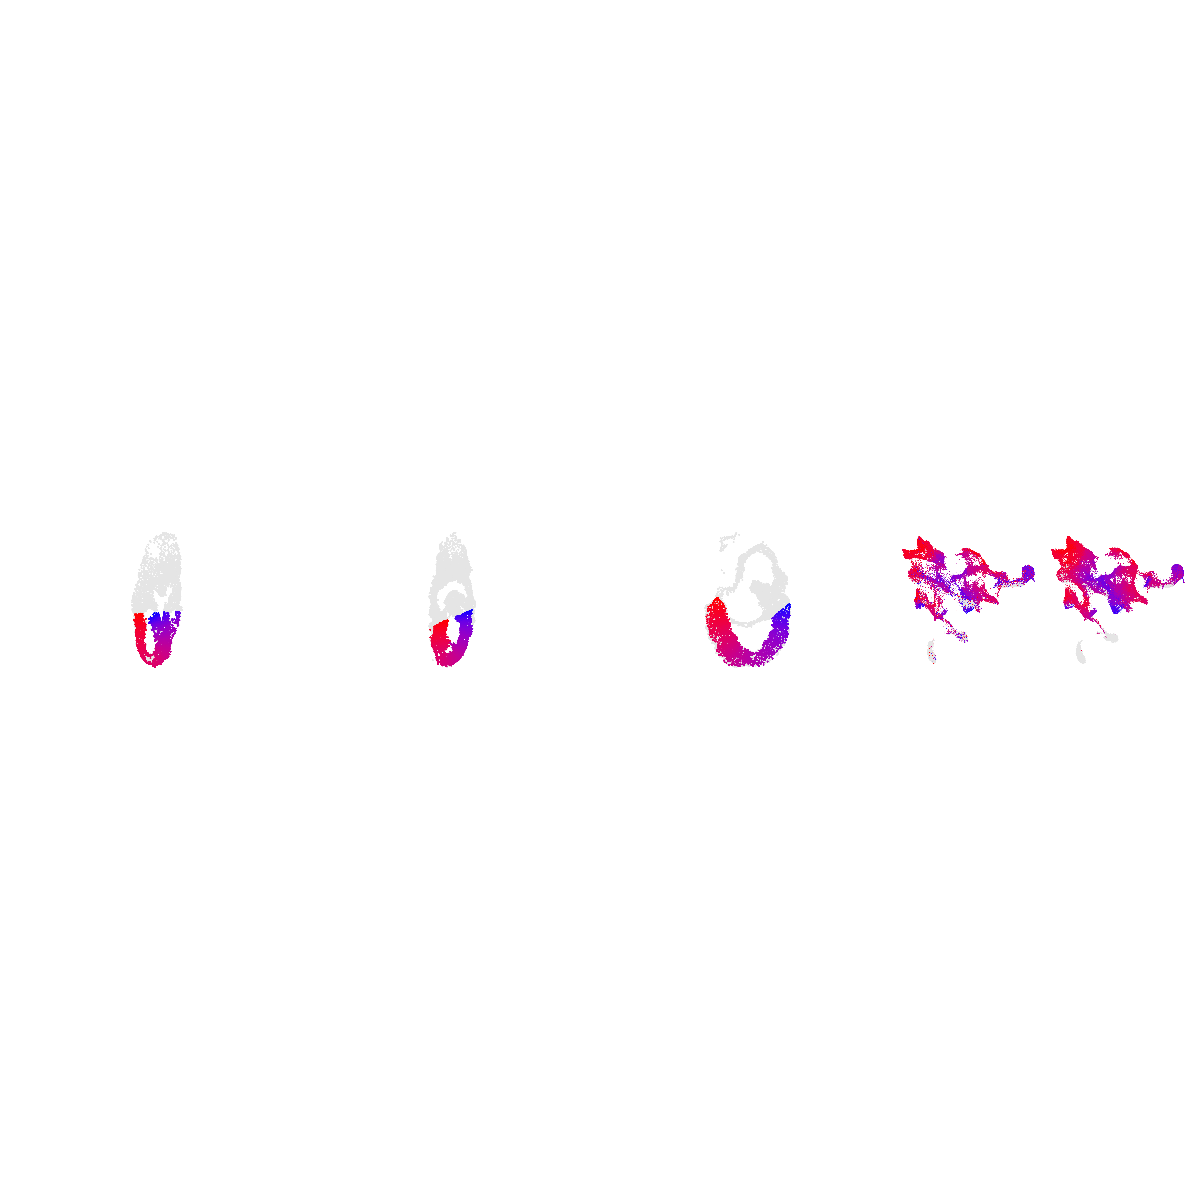

In [39]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 3.5, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)
p4_raster <- rasterize_plot(p4)
#p5_raster <- rasterize_plot(p5)
#p6_raster <- rasterize_plot(p6)
#p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
#p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
#p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
#p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3, p4,
  ncol = 4, nrow = 1) +
  plot_layout(
    widths = c(1, 1, 1, 1),
    heights = c(1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/AP_values_SPATIAL.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, width = (150/4), height = ((200/4)*1/5))
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

png 
  2

Plot saved to projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/AP_values_UMAP.pdf

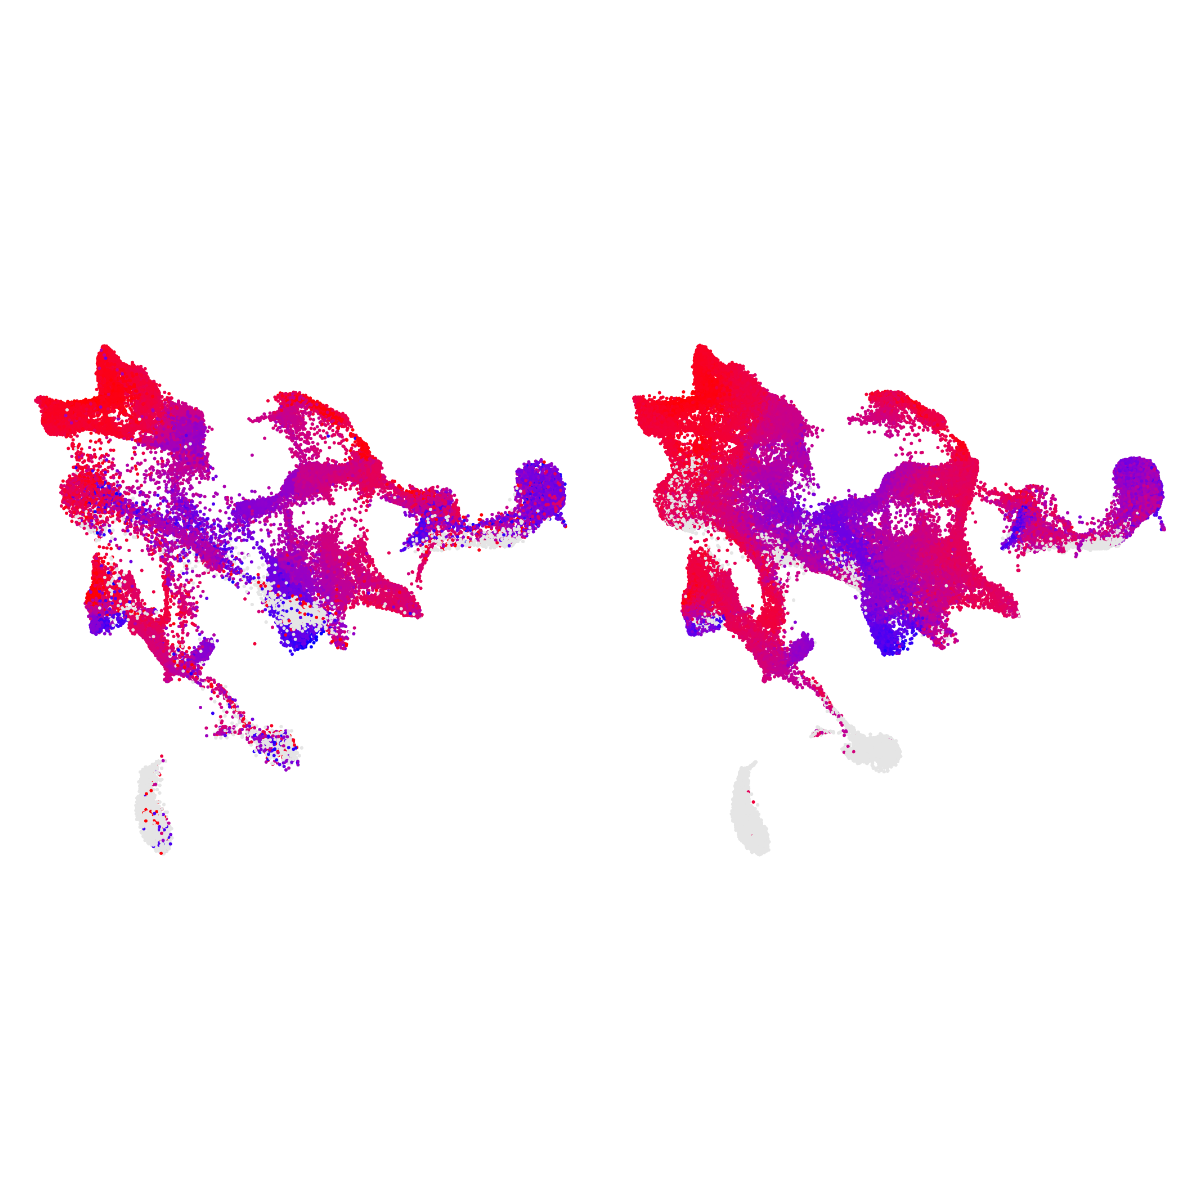

In [40]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 3.5, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)
p4_raster <- rasterize_plot(p4)
#p5_raster <- rasterize_plot(p5)
#p6_raster <- rasterize_plot(p6)
#p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
#p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
#p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
#p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p4,
  ncol = 1, nrow = 1) +
  plot_layout(
    widths = c(3),
    heights = c(1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/AP_values_UMAP.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, width = (150/4), height = ((200/4)*1/5))
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

In [41]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 3.5, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p5)
p2_raster <- rasterize_plot(p6)
p3_raster <- rasterize_plot(p7)
p4_raster <- rasterize_plot(p8)
#p5_raster <- rasterize_plot(p5)
#p6_raster <- rasterize_plot(p6)
#p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
#p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
#p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
#p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3, p4,
  ncol = 1, nrow = 4) +
  plot_layout(
    widths = c(1),
    heights = c(1,1,1,1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/AP_values_UMAP_split_by_anatomy.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, height = (150/4), width = ((200/4)*1/5))
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

## Plot Cells in Space Related to Tradeseq Subset

In [ ]:
plot_AP_values <- function(seqFISH_postQC, seqFISH_preQC, 
                           cell_type_to_plot = "Epiblast", 
                           min_AP = 50, max_AP = 100, 
                           pt_size = 1, 
                           min_DV = 30, max_DV = 100, 
                           embryo_to_plot = "embryo_7",
                           output_dir = NULL,   # Add default value
                           file_name = "plot.pdf") {  # Add default value{
  
  # Extract meta.data
  seqFISH_postQC_meta <- seqFISH_postQC@meta.data
  seqFISH_preQC_meta <- seqFISH_preQC@meta.data
  
  options(repr.plot.width=10, repr.plot.height=10)
  
  # Calculate ranges
  AP_pos_max <- max(seqFISH_postQC_meta$AP, na.rm = TRUE)
  AP_pos_min <- min(seqFISH_postQC_meta$AP, na.rm = TRUE)
  
  DV_pos_max <- max(seqFISH_postQC_meta$DV, na.rm = TRUE)
  DV_pos_min <- min(seqFISH_postQC_meta$DV, na.rm = TRUE)
  
  dim2_max <- max(seqFISH_postQC_meta$dim2, na.rm = TRUE)
  dim2_min <- min(seqFISH_postQC_meta$dim2, na.rm = TRUE)
  
  ## Plot AP Values
  upper_bound <- AP_pos_max
  lower_bound <- AP_pos_min
  
  p1 <- ggplot(seqFISH_postQC_meta[seqFISH_postQC_meta$embryo == embryo_to_plot & 
                                    seqFISH_postQC_meta$refined_annotation %in% cell_type_to_plot & 
                                    seqFISH_postQC_meta$joint_clusters_pass_QC == TRUE &
                                    seqFISH_postQC_meta$AP >= min_AP & 
                                    seqFISH_postQC_meta$AP <= max_AP & 
                                    seqFISH_postQC_meta$DV >= min_DV & 
                                    seqFISH_postQC_meta$DV <= max_DV , ], aes(dim1, dim2, col=AP)) + 
    geom_point(data=seqFISH_preQC_meta[seqFISH_preQC_meta$embryo == embryo_to_plot, ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound)) + 
    theme_void() + 
    theme(legend.position='right') + 
    coord_fixed()
  
  print(p1)
    
  # Construct the full file path
  file_path <- file.path(output_dir, file_name)
  
  # Save the plot as a rasterized PDF using Cairo
  CairoPDF(file = file_path, width = 10, height = 10)
  print(p1)
  dev.off()
    
  # Construct the full file path
  file_path <- file.path(output_dir, file_name)
  
  # Save the plot as a rasterized PDF using Cairo
  CairoPDF(file = file_path, width = 4, height = 4)
  print(p1)
  dev.off()
}

# Example usage:
plot_AP_values(seqFISH_postQC, seqFISH_preQC,
               cell_type_to_plot = c("ExE endoderm", "Visceral endoderm", "Parietal endoderm", "Primitive Streak", "Nascent mesoderm"),
               min_AP = 0, max_AP = 50,
               pt_size = 0.01,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo7",
               output_dir = "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/tradeseq_1/",  # Provide the correct directory path
               file_name = "AP_plot.pdf")

In [ ]:
plot_refined_annotations <- function(seqFISH_postQC, seqFISH_preQC, 
                           cell_type_to_plot = "Epiblast", 
                           min_AP = 50, max_AP = 100, 
                           pt_size = 1, 
                           min_DV = 30, max_DV = 100, 
                           embryo_to_plot = "embryo7",
                           output_dir = NULL,   # Add default value
                           file_name = "plot.pdf") {  # Add default value
  
  # Check if output_dir is provided
  if (is.null(output_dir)) {
    stop("Error: 'output_dir' must be specified.")
  }
  
  # Extract meta.data
  seqFISH_postQC_meta <- seqFISH_postQC@meta.data
  seqFISH_preQC_meta <- seqFISH_preQC@meta.data
  
  # Set plot dimensions
  options(repr.plot.width = 10, repr.plot.height = 10)
  
  ## Plot AP Values
  p1 <- ggplot(seqFISH_postQC_meta[seqFISH_postQC_meta$embryo == embryo_to_plot & 
                                    seqFISH_postQC_meta$refined_annotation %in% cell_type_to_plot & 
                                    seqFISH_postQC_meta$joint_clusters_pass_QC == TRUE &
                                    seqFISH_postQC_meta$AP >= min_AP & 
                                    seqFISH_postQC_meta$AP <= max_AP & 
                                    seqFISH_postQC_meta$DV >= min_DV & 
                                    seqFISH_postQC_meta$DV <= max_DV, ], 
               aes(dim1, dim2, col = refined_annotation)) + 
    geom_point(data = seqFISH_preQC_meta[seqFISH_preQC_meta$embryo == embryo_to_plot, ], 
               col = 'grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    scale_color_manual(values = refined_annotation_colors) + 
    theme_void() + 
    theme(legend.position = 'none') + 
    coord_fixed()
  
  print(p1)
  
  # Construct the full file path
  file_path <- file.path(output_dir, file_name)
  
  # Save the plot as a rasterized PDF using Cairo
  CairoPDF(file = file_path, width = 2, height = 2)
  print(p1)
  dev.off()
}

# Example usage:
plot_refined_annotations(seqFISH_postQC, seqFISH_preQC,
               cell_type_to_plot = c("Primitive Streak"),
               min_AP = 0, max_AP = 50,
               pt_size = 0.1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo7",
               output_dir = "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/tradeseq_1/",  # Provide the correct directory path
               file_name = "primitive_streak_plot.pdf")

plot_refined_annotations(seqFISH_postQC, seqFISH_preQC,
               cell_type_to_plot = c("Nascent mesoderm"),
               min_AP = 0, max_AP = 50,
               pt_size = 0.1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo7",
               output_dir = "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/tradeseq_1/",  # Provide the correct directory path
               file_name = "NM_plot.pdf")

plot_refined_annotations(seqFISH_postQC, seqFISH_preQC,
               cell_type_to_plot = c("ExE endoderm", "Visceral endoderm", "Parietal endoderm"),
               min_AP = 0, max_AP = 50,
               pt_size = 0.1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo7",
               output_dir = "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/tradeseq_1/",  # Provide the correct directory path
               file_name = "endoderm_plot.pdf")


In [ ]:
# Define your data filtering criteria
embryos_to_include <- c("embryo7")
cell_types_to_include <- c("Epiblast", "Nascent mesoderm", "Primitive Streak", "Anterior Primitive Streak", "Visceral endoderm", "Parietal endoderm", "ExE endoderm")

# Subset the data based on the filtering criteria
seqFISH_subset <- subset(seqFISH_postQC, 
                         subset = embryo %in% embryos_to_include &
                                  joint_clusters_pass_QC == TRUE &
                                  refined_annotation %in% cell_types_to_include)

# Define the specific column names you want to keep
selected_columns <- c("cell_ID", "refined_annotation", "AP")

# Subset the data frame to include only the selected columns
subsetted_sorted_meta <- seqFISH_subset@meta.data[selected_columns]

# Convert "extended_atlas_celltype_transfer" to factor with desired order
subsetted_sorted_meta$refined_annotation <- factor(subsetted_sorted_meta$refined_annotation, 
                                                                 levels = cell_types_to_include)

# Display the heatmap_plot
options(repr.plot.width=6, repr.plot.height=6)

# Plot using ggridges with transparent fill and pseudo-3D effect
p1 <- ggplot(subsetted_sorted_meta, aes(x = AP, y = refined_annotation, fill = refined_annotation)) +
  geom_density_ridges() +
  scale_fill_manual(values = alpha(extended.colors, 0.75)) +  # Apply alpha to colors
  theme_ridges() +
  theme(legend.position = "none") +  # Remove the legend
  labs(x = "", y = "") +  # Add axis labels
  theme(plot.title = element_text(hjust = 0.5),
       panel.grid.major.x = element_blank()) + 
  xlim(0, 100) +  # Set x-axis limits
  scale_x_reverse(breaks = seq(0, 100, by = 25)) + 
  #annotate("text", x = 100, y = 0, label = "Anterior", vjust = -1, hjust = 0.5) +  # Add label "Anterior" at x = 100
  #annotate("text", x = 0, y = 0, label = "Posterior", vjust = -1, hjust = 0.5) +   # Add label "Posterior" at x = 0 
  geom_vline(xintercept = c(0, 50), color = "black", linetype = "dashed")  # Add vertical grid lines at 0 and 60 in red

  # Construct the full file path

  output_dir = "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/tradeseq_1/"
  file_name = "ridges_plot_AP.pdf"    
  file_path <- file.path(output_dir, file_name)

  # Save the plot as a rasterized PDF using Cairo
  CairoPDF(file = file_path, width = 4, height = 4)
  print(p1)
  dev.off()

## TRADESEQ PIPELINE

In [ ]:
colnames(seqFISH_postQC@meta.data)

In [ ]:
filter_seurat_object <- function(seurat_obj, embryos_to_include, celltype_to_include, min_AP, max_AP, min_DV, max_DV, X) {
  
  # Subset the Seurat object
  seurat_subset <- subset(seurat_obj, 
                          subset = embryo %in% embryos_to_include &
                                   refined_annotation %in% celltype_to_include &
                                   passed_QC == TRUE &
                                   AP >= min_AP & AP <= max_AP &
                                   DV >= min_DV & DV <= max_DV)
  
  # Get the metadata including the "refined_annotation"
  metadata <- seurat_subset@meta.data
  
  # Count the number of cells in each "refined_annotation" group
  annotation_counts <- table(metadata$refined_annotation)
  
  # Filter for annotations with X or more cells
  valid_annotations <- names(annotation_counts[annotation_counts >= X])
  
  # Subset the Seurat object based on the valid annotations
  seurat_filtered <- subset(seurat_subset, subset = refined_annotation %in% valid_annotations)
  
  # Return the filtered Seurat object
  return(seurat_filtered)
}

# Example usage:
# Define parameters
embryos_to_include <- "embryo7"
celltype_to_include <- c("Primitive Streak", "Nascent mesoderm", "Parietal endoderm", "ExE endoderm", "Visceral endoderm")
min_AP <- 0
max_AP <- 50
min_DV <- 0 
max_DV <- 100
X <- 10 

# Call the function
seqFISH_filtered <- filter_seurat_object(seqFISH_postQC, embryos_to_include, celltype_to_include, min_AP, max_AP, min_DV, max_DV, X)

In [ ]:
table(seqFISH_filtered@meta.data$refined_annotation)

In [ ]:
# Assuming your data frame is called df
seqFISH_filtered@meta.data <- seqFISH_filtered@meta.data %>%
  mutate(refined_annotation = case_when(
    refined_annotation %in% c("ExE endoderm", "Visceral endoderm") ~ "Visceral endoderm",
    TRUE ~ refined_annotation  # Keep the remaining names unchanged
  ))

In [ ]:
table(seqFISH_filtered@meta.data$refined_annotation)

In [ ]:
## Find Variable Features to Restrict which Genes are Explored in TRADESEQ
DefaultAssay(seqFISH_filtered) <- "imputedcounts"
number_features <- 2000
seqFISH_filtered <- FindVariableFeatures(seqFISH_filtered, nfeatures = number_features, assay = "imputedcounts")
var_features <- VariableFeatures(seqFISH_filtered)

### Generate matrices for fitGAM

In [ ]:
generate_matrices <- function(seqFISH_filtered, AP_column) {
  
  # Generate the counts matrix
  counts <- seqFISH_filtered@assays$imputedcounts@counts
  
  #### Generate the pseudotime matrix ####
  pseudotime <- seqFISH_filtered@meta.data %>%
    select(all_of(AP_column), refined_annotation)
  
  # Get the unique cell types from the refined_annotation column
  unique_cell_types <- unique(pseudotime$refined_annotation)
  
  # Loop over each unique cell type to create a new column
  for (cell_type in unique_cell_types) {
    # Create a new column name based on the cell type
    new_column_name <- paste("lineage", cell_type, sep = "_")
    
    # Populate the new column with the AP values (same for all rows)
    pseudotime[[new_column_name]] <- pseudotime[[AP_column]]
  }
  
  # Remove the original AP and refined_annotation columns
  pseudotime <- pseudotime[, !(names(pseudotime) %in% c(AP_column, "refined_annotation"))]
  
  # Now pseudotime contains the AP values repeated in each new lineage column
  
  ### Generate the cell weights matrix ###
  
  # Get the unique cell types from the refined_annotation column
  unique_cell_types <- unique(seqFISH_filtered@meta.data$refined_annotation)
  
  # Initialize a matrix with dimensions: number of cells x number of unique cell types
  cell_weights <- matrix(0, nrow = nrow(seqFISH_filtered@meta.data), ncol = length(unique_cell_types))
  
  # Generate the column names with the same naming convention as in pseudotime
  colnames(cell_weights) <- paste("lineage", unique_cell_types, sep = "_")
  rownames(cell_weights) <- rownames(seqFISH_filtered@meta.data)
  
  # Populate the matrix with 1s where the cell belongs to the lineage
  for (i in 1:length(unique_cell_types)) {
    cell_weights[, i] <- ifelse(seqFISH_filtered@meta.data$refined_annotation == unique_cell_types[i], 1, 0)
  }
  
  # If there is only one unique cell type, set all values to 1
  if (length(unique_cell_types) == 1) {
    cell_weights <- matrix(1, nrow = nrow(seqFISH_filtered@meta.data), ncol = 1)
    colnames(cell_weights) <- paste("lineage", unique_cell_types, sep = "_")
    rownames(cell_weights) <- rownames(seqFISH_filtered@meta.data)
  }
  
  # Return the generated matrices as a list
  return(list(counts = counts, pseudotime = pseudotime, cell_weights = cell_weights))
}

# Example usage:
 result <- generate_matrices(seqFISH_filtered, "AP")
 counts <- result$counts
 pseudotime <- result$pseudotime
 cell_weights <- result$cell_weights

In [ ]:
head(pseudotime)

### Run FITGAM

In [ ]:
# Fit GAM model
sce_GAM <- fitGAM(counts = counts, 
                  pseudotime = pseudotime, 
                  cellWeights = cell_weights,
                  genes = var_features,
                  nknots = 6, 
                  verbose = TRUE)

# Save sce_GAM to a specific file location
saveRDS(sce_GAM, file = "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/tradeseq_1/sce_GAM_AP_embryo7.rds")

# Within lineage comparisons, test for all lineages independently
assoRes <- associationTest(sce_GAM, lineages = TRUE)

# Save assoRes to a specific file location
saveRDS(assoRes, file = "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/tradeseq_1/assoRes_AP_embryo7.rds")

### Identify genes changing along the axes in each cell type

In [ ]:
# Filter the assoRes data frame to keep only rows with pvalue < 0.05
# Filter using dplyr to keep only rows with pvalue_1 < 0.05 or pvalue_2 < 0.05
assoRes_filtered_1 <- assoRes %>% 
  filter(pvalue_1 < 0.05 & meanLogFC >= log2(1.3))

assoRes_filtered_2 <- assoRes %>% 
  filter(pvalue_2 < 0.05 & meanLogFC >= log2(1.3))

assoRes_filtered_3 <- assoRes %>% 
  filter(pvalue_3 < 0.05 & meanLogFC >= log2(1.3))

lin1_genes <- rownames(assoRes_filtered_1)
lin2_genes <- rownames(assoRes_filtered_2)
lin3_genes <- rownames(assoRes_filtered_3)

In [ ]:
# extracting fitted values 
ysmooth_lin1 <- predictSmooth(models = sce_GAM, gene = unique(lin1_genes), nPoints = 100, tidy = FALSE)
ysmooth_lin2 <- predictSmooth(models = sce_GAM, gene = unique(lin2_genes), nPoints = 100, tidy = FALSE)
ysmooth_lin3 <- predictSmooth(models = sce_GAM, gene = unique(lin3_genes), nPoints = 100, tidy = FALSE)

ysmooth <- predictSmooth(models = sce_GAM, gene = unique(c(lin1_genes,lin2_genes, lin3_genes)), nPoints = 100, tidy = FALSE)

### Generate Heatmap

In [ ]:
# Scale each row
ysmooth_scaled <- t(apply(ysmooth, 1, scale))

In [ ]:
clusters <- 20

# Assuming `data_matrix` is your original data matrix
# Scale each row
scaled_data <- t(apply(ysmooth, 1, scale))

# Step 2: Perform hierarchical clustering on the scaled data
row_hclust <- hclust(dist(scaled_data))

# Step 3: Cut the tree into clusters (let's say 3 clusters)
cutree_result <- cutree(row_hclust, k = clusters)

# Step 4: Create a data frame for the row annotations (cluster numbers)
row_annotation <- data.frame(Cluster = factor(cutree_result))
rownames(row_annotation) <- rownames(scaled_data)

# Step 4: Retrieve row names for each cluster
clusters <- split(rownames(scaled_data), cutree_result)

# Optional: Display the row names for each cluster
clusters

# Create the heatmap using pheatmap with marker genes on the x-axis and cell types on the y-axis
heatmap_plot <- pheatmap(scaled_data,
                         #scale = "row",
                         cluster_rows = row_hclust,  
                         cluster_cols = FALSE,  
                         #color = viridis(100),
                         border_color = NA,
                         display_numbers = FALSE,
                         breaks = seq(-2, 2, length.out = 101),
                         show_colnames = FALSE,
                         show_rownames = FALSE,
                         #annotation_col=subsetted_sorted_meta,
                         #annotation_colors = my_colour,
                         use_raster = TRUE,
                         fontsize_row = 3,
                         cutree_rows = 10,
                         #cutree_cols = 3,
                         annotation_row = row_annotation,
                         #legend = TRUE,
                         treeheight_row = 0
                         #legend_labels = NULL
                        )

# Display the heatmap_plot
wi <- 10
he <- 10

options(repr.plot.width=wi, repr.plot.height=he)
heatmap_plot 

# set the output directory
output_dir = "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/tradeseq_1/"

# set the filename
    file_name <- paste0("tradeseq_AP","heatmap","embryo7",
                       ".pdf")

# Save the grid plot as .svg file to specific file path
 ggsave(filename = file.path(output_dir, file_name), plot = heatmap_plot, device = "pdf",
      width = wi,
      height = he)

In [ ]:
head(ysmooth_scaled)

In [ ]:
## save the genes in each cluster as a CSV for https://metascape.org/gp/index.html#/main/step1

# Step 1: Find the maximum length of the gene lists
max_length <- max(sapply(clusters, length))

# Step 2: Pad shorter lists with NA to match the maximum length
clusters_padded <- lapply(clusters, function(x) {
  c(x, rep(NA, max_length - length(x)))
})

# Step 3: Convert the list to a data.table
cluster_dt <- as.data.table(clusters_padded)

# Step 4: Set the output directory and file name
output_dir <- "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/tradeseq_1/"
file_name <- "clusters_table.csv"

# Step 5: Write the data.table to a CSV file
fwrite(cluster_dt, file = file.path(output_dir, file_name), na = "", quote = FALSE)

In [ ]:
# Set the output directory and file name
#output_dir <- "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/tradeseq_1/"
#file_name <- "clusters_table.csv"

# Write the data frame to a CSV file
#write.csv(cluster_dt, file = file.path(output_dir, file_name), row.names = FALSE)

## Plot imputed gene expression in the primitive streak region

In [ ]:
#DefaultAssay(seqFISH_filtered) <- "imputed"

In [ ]:
#gene <- "Sox2"
#plot <- FeaturePlot(seqFISH_filtered, reduction = "spatial", feature = gene, pt.size = 3, order = TRUE) + coord_fixed()

# set the output directory
#output_dir = "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq"

# set the filename
#    file_name <- paste0(gene,
#                       ".pdf")

# Save the grid plot as .svg file to specific file path
# ggsave(filename = file.path(output_dir, file_name), plot = plot, device = "pdf",
#      width = 4,
#      height = 4)

## Plot Hox gene expression along all the embryos

In [32]:
hox_genes <- c(
  "Hoxa1", "Hoxa2", "Hoxa3", "Hoxa4", "Hoxa5", "Hoxa6", "Hoxa7", "Hoxa9", "Hoxa10", "Hoxa11", "Hoxa13",
  "Hoxb1", "Hoxb2", "Hoxb3", "Hoxb4", "Hoxb5", "Hoxb6", "Hoxb7", "Hoxb8", "Hoxb9", "Hoxb13",
  "Hoxc4", "Hoxc5", "Hoxc6", "Hoxc8", "Hoxc9", "Hoxc10", "Hoxc11", "Hoxc12", "Hoxc13",
  "Hoxd1", "Hoxd3", "Hoxd4", "Hoxd8", "Hoxd9", "Hoxd10", "Hoxd11", "Hoxd12", "Hoxd13"
)

In [31]:
# Subset the original seqFISH data to include only the cells that passed QC
seqFISH_postQC_ss <- seqFISH_postQC[, seqFISH_postQC@meta.data$passed_QC == TRUE]

# Extract the metadata for the subset of cells that passed QC
seqFISH_postQC_ss_meta <- seqFISH_postQC_ss@meta.data

# Transpose the imputed counts data for cells that passed QC
seqFISH_passQC_imputed_counts <- t(seqFISH_postQC_ss@assays$imputed@data)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from shila_umap_ to shilaumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from stabmap_umap_ to stabmapumap_”


ERROR: Error in eval(expr, envir, enclos): object 'hox_genes' not found


In [33]:
# Subset the imputed counts data to include only the Hox genes
seqFISH_passQC_imputed_counts_hox_genes <- seqFISH_passQC_imputed_counts[, hox_genes]

# Convert the matrix of Hox gene expressions to a data frame for easier manipulation
seqFISH_passQC_imputed_counts_hox_genes <- as.data.frame(seqFISH_passQC_imputed_counts_hox_genes)

# Add a cell_ID column to the data frame, using row names as the cell IDs
seqFISH_passQC_imputed_counts_hox_genes$cell_ID <- row.names(seqFISH_passQC_imputed_counts_hox_genes)

# Prepare the data frames for merging
df1 <- seqFISH_passQC_imputed_counts_hox_genes  # Hox gene expression data with cell IDs
df2 <- seqFISH_postQC_ss_meta  # Metadata for cells that passed QC

# Merge the Hox gene expression data with the metadata by cell_ID
merged_df <- merge(df1, df2, by = "cell_ID")

# Set the row names of the merged data frame to be the cell_IDs
rownames(merged_df) <- merged_df$cell_ID

In [63]:
plot_hox_expression <- function(df, gene_name, stages_colors) {
  # Create a dynamic column name for the Hox gene
  gene_column <- sym(gene_name)
  
  # Bin the AP axis into chunks of size 1 and group by Estage
  df_binned <- df %>%
    mutate(AP_bin = floor(AP)) %>%  # Create bins by flooring AP axis values
    group_by(AP_bin, Estage) %>%  # Group by both bins and Estage
    summarise(gene_avg = mean(!!gene_column, na.rm = TRUE))  # Calculate the average expression for each bin and Estage
  
  # Plot the binned average expression with a smooth curve and confidence interval
  ggplot(df_binned, aes(x = AP_bin, y = gene_avg, color = Estage)) +
    geom_point(size = 2) +  # Scatter plot of binned averages
    geom_smooth(method = "loess", se = TRUE, aes(fill = Estage), color = NA) +  # Smooth curve with matching confidence interval color
    scale_x_reverse() +  # Reverse the x-axis
    scale_color_manual(values = stages_colors) +  # Set custom colors for Estage
    scale_fill_manual(values = stages_colors) +  # Set the fill color of the CI to match the line color
    labs(title = paste("Binned", gene_name, "Gene Expression Along the AP Axis by Estage"),
         x = "AP Axis Position (Binned)",
         y = paste("Average", gene_name, "Expression Level")) +
    theme_void() +  # Start with a clean theme
    ggtitle(NULL) +
    theme(legend.position = "none"
      #axis.line = element_line(),       # Add axis lines
      #axis.ticks = element_line(),      # Add axis ticks
      #axis.text = element_text(),       # Add axis text (labels)
      #axis.ticks.length = unit(0.25, "cm") # Customize the length of the ticks
    )
}

# Example usage:
# Define a custom color palette for Estage

p1 <- plot_hox_expression(merged_df, "Hoxa1", stages_colors)
p2 <- plot_hox_expression(merged_df, "Hoxa2", stages_colors)
p3 <- plot_hox_expression(merged_df, "Hoxa4", stages_colors)
p4 <- plot_hox_expression(merged_df, "Hoxa6", stages_colors)
p5 <- plot_hox_expression(merged_df, "Hoxa7", stages_colors)
p6 <- plot_hox_expression(merged_df, "Hoxa11", stages_colors)

`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.


png 
  2

Plot saved to projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/hoxa_gene_expression.pdf

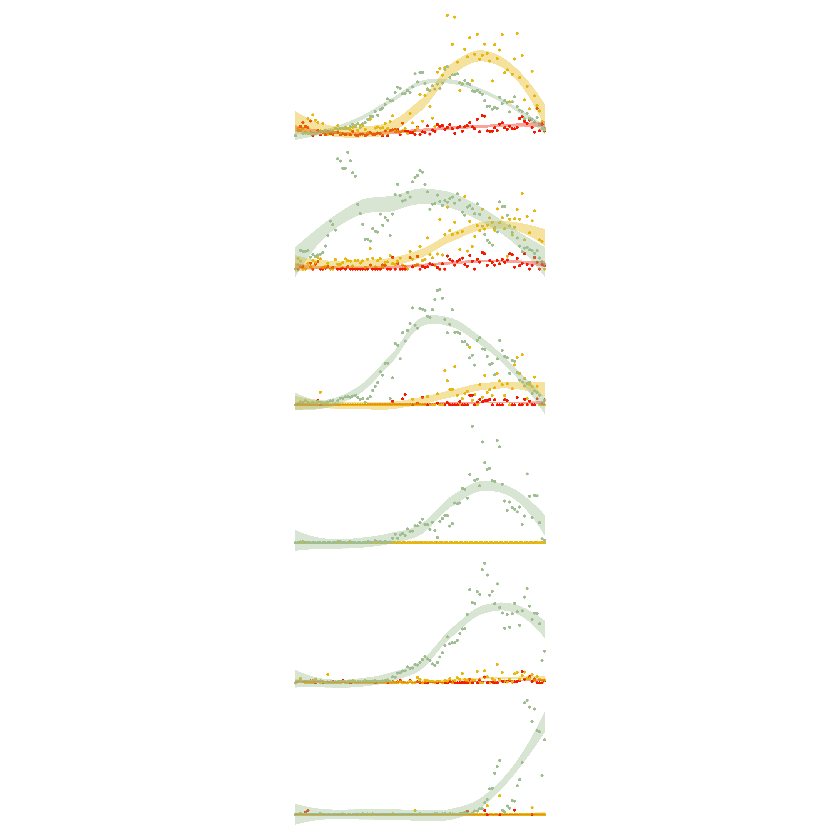

In [65]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 3.5, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)
p4_raster <- rasterize_plot(p4)
p5_raster <- rasterize_plot(p5)
p6_raster <- rasterize_plot(p6)
#p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
#p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3, p4,p5, p6,
  ncol = 1, nrow = 6) +
  plot_layout(
    widths = c(1),
    heights = c(1,1,1,1,1,1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/hoxa_gene_expression.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, height = (150/4), width = ((200/4)*1/5))
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

In [67]:
plot_hox_expression <- function(df, gene_name, stages_colors) {
  # Create a dynamic column name for the Hox gene
  gene_column <- sym(gene_name)
  
  # Bin the AP axis into chunks of size 1 and group by Estage
  df_binned <- df %>%
    mutate(AP_bin = floor(AP)) %>%  # Create bins by flooring AP axis values
    group_by(AP_bin, Estage) %>%  # Group by both bins and Estage
    summarise(gene_avg = mean(!!gene_column, na.rm = TRUE))  # Calculate the average expression for each bin and Estage
  
  # Plot the binned average expression with a smooth curve and confidence interval
  ggplot(df_binned, aes(x = AP_bin, y = gene_avg, color = Estage)) +
    geom_point(size = 2) +  # Scatter plot of binned averages
    geom_smooth(method = "loess", se = TRUE, aes(fill = Estage), color = NA) +  # Smooth curve with matching confidence interval color
    scale_x_reverse() +  # Reverse the x-axis
    scale_color_manual(values = stages_colors) +  # Set custom colors for Estage
    scale_fill_manual(values = stages_colors) +  # Set the fill color of the CI to match the line color
    labs(title = paste("Binned", gene_name, "Gene Expression Along the AP Axis by Estage"),
         x = "AP Axis Position (Binned)",
         y = paste("Average", gene_name, "Expression Level")) +
    theme_void() +  # Start with a clean theme
    ggtitle(NULL) +
    theme(legend.position = "none"
      #axis.line = element_line(),       # Add axis lines
      #axis.ticks = element_line(),      # Add axis ticks
      #axis.text = element_text(),       # Add axis text (labels)
      #axis.ticks.length = unit(0.25, "cm") # Customize the length of the ticks
    )
}

# Example usage:
# Define a custom color palette for Estage

p1 <- plot_hox_expression(merged_df, "Hoxb1", stages_colors)
p2 <- plot_hox_expression(merged_df, "Hoxb2", stages_colors)
p3 <- plot_hox_expression(merged_df, "Hoxb4", stages_colors)
p4 <- plot_hox_expression(merged_df, "Hoxb6", stages_colors)
p5 <- plot_hox_expression(merged_df, "Hoxb7", stages_colors)
p6 <- plot_hox_expression(merged_df, "Hoxb9", stages_colors)

`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


png 
  2

Plot saved to projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/hoxb_gene_expression.pdf

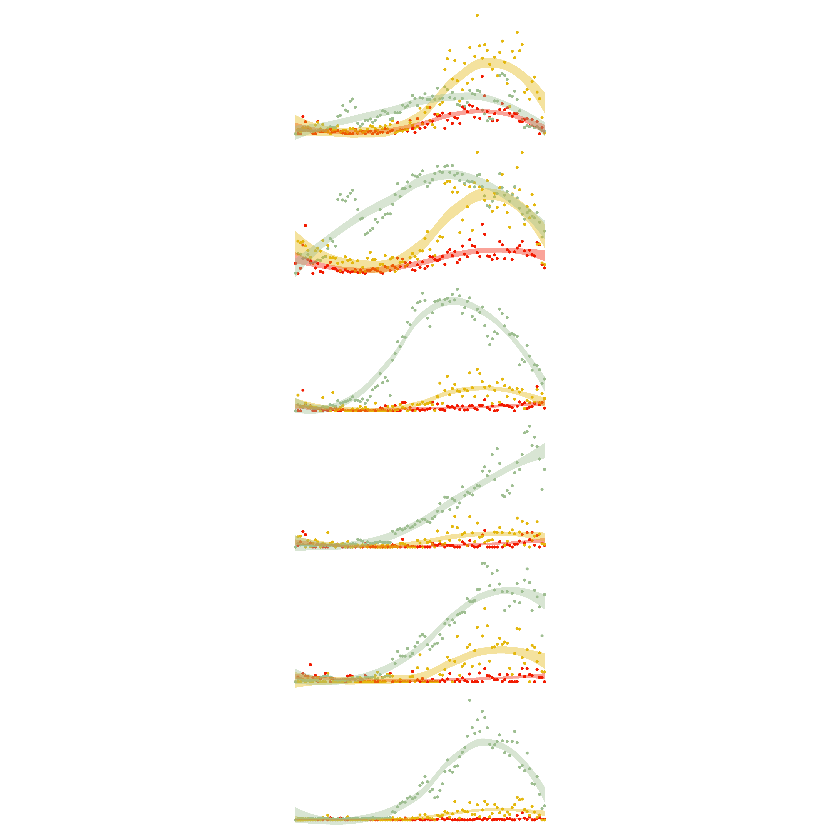

In [68]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 3.5, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)
p4_raster <- rasterize_plot(p4)
p5_raster <- rasterize_plot(p5)
p6_raster <- rasterize_plot(p6)
#p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
#p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3, p4,p5, p6,
  ncol = 1, nrow = 6) +
  plot_layout(
    widths = c(1),
    heights = c(1,1,1,1,1,1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/hoxb_gene_expression.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, height = (150/4), width = ((200/4)*1/5))
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)